In [1]:
# импортируем библиотеки, классы и функции
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot
# загружаем данные
df = pd.read_csv('Data/online_retail.csv')

# подготовим данные
df['date'] = pd.to_datetime(df['date'])
df.columns = ['ds', 'y']

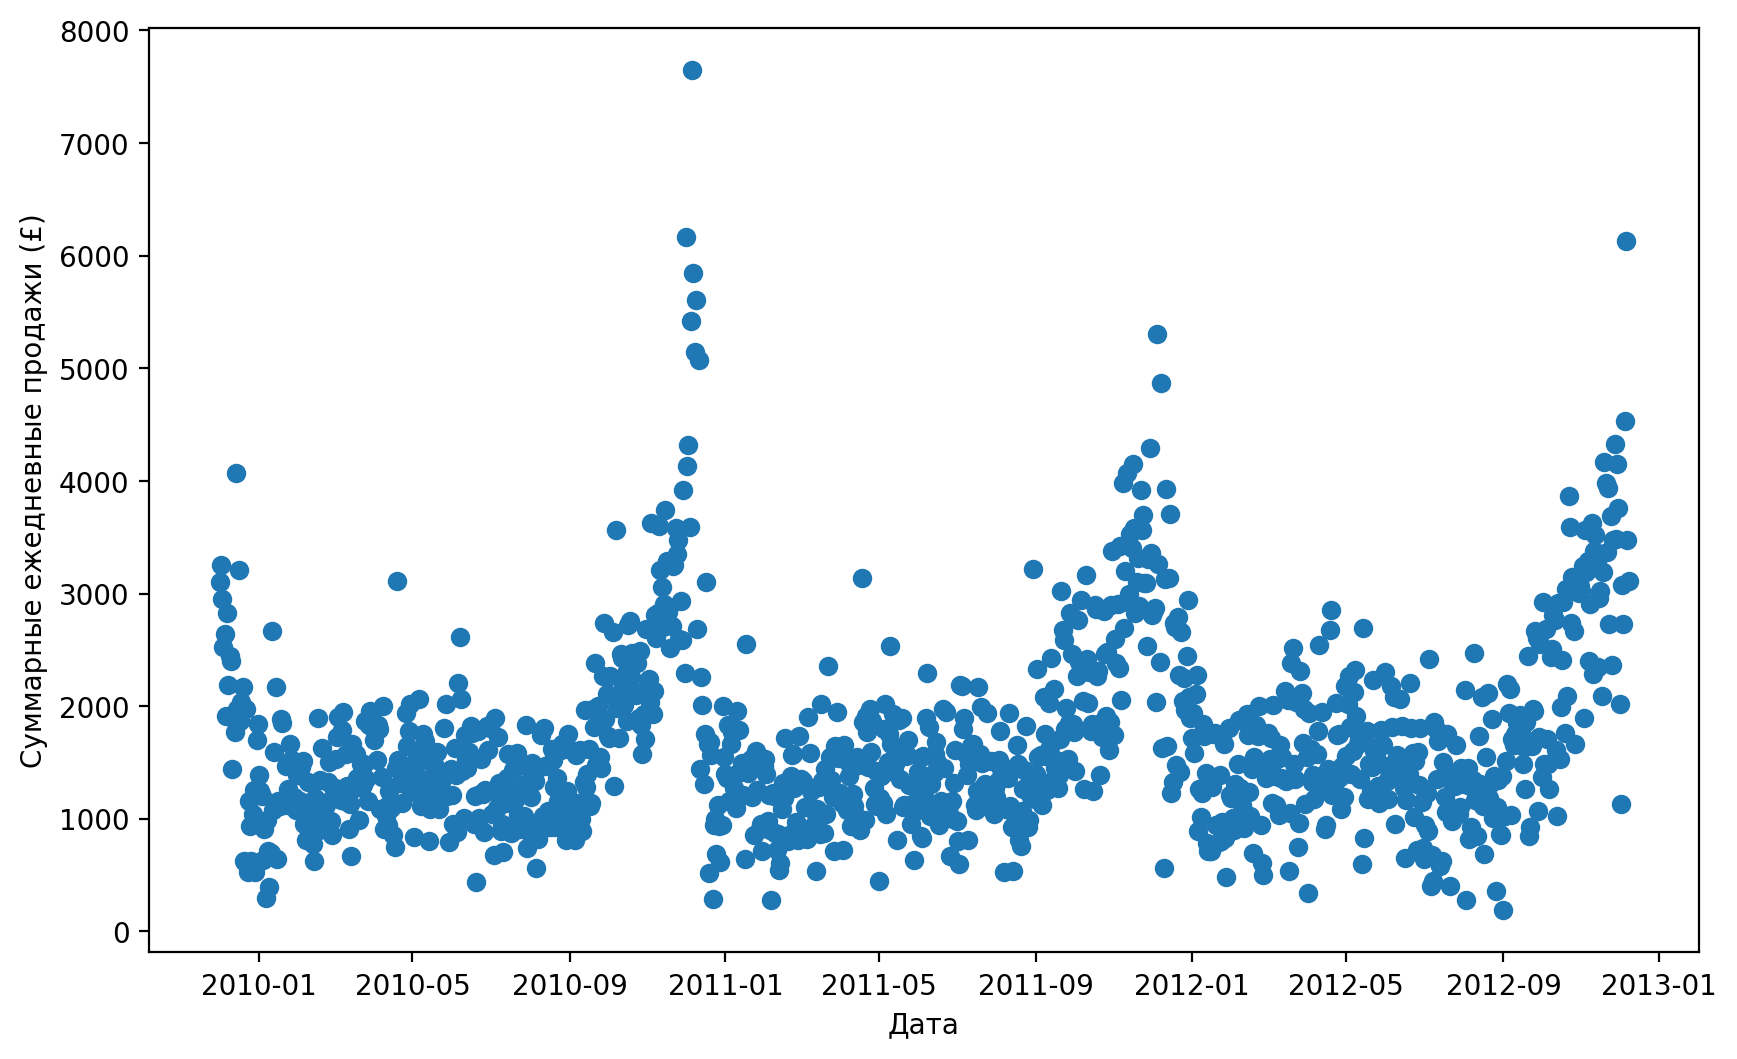

In [2]:
# визуализируем данные
plt.figure(figsize=(10, 6))
plt.scatter(df['ds'], df['y'])
plt.xlabel('Дата')
plt.ylabel('Суммарные ежедневные продажи (£)')
plt.show()

22:28:32 - cmdstanpy - INFO - Chain [1] start processing
22:28:32 - cmdstanpy - INFO - Chain [1] done processing


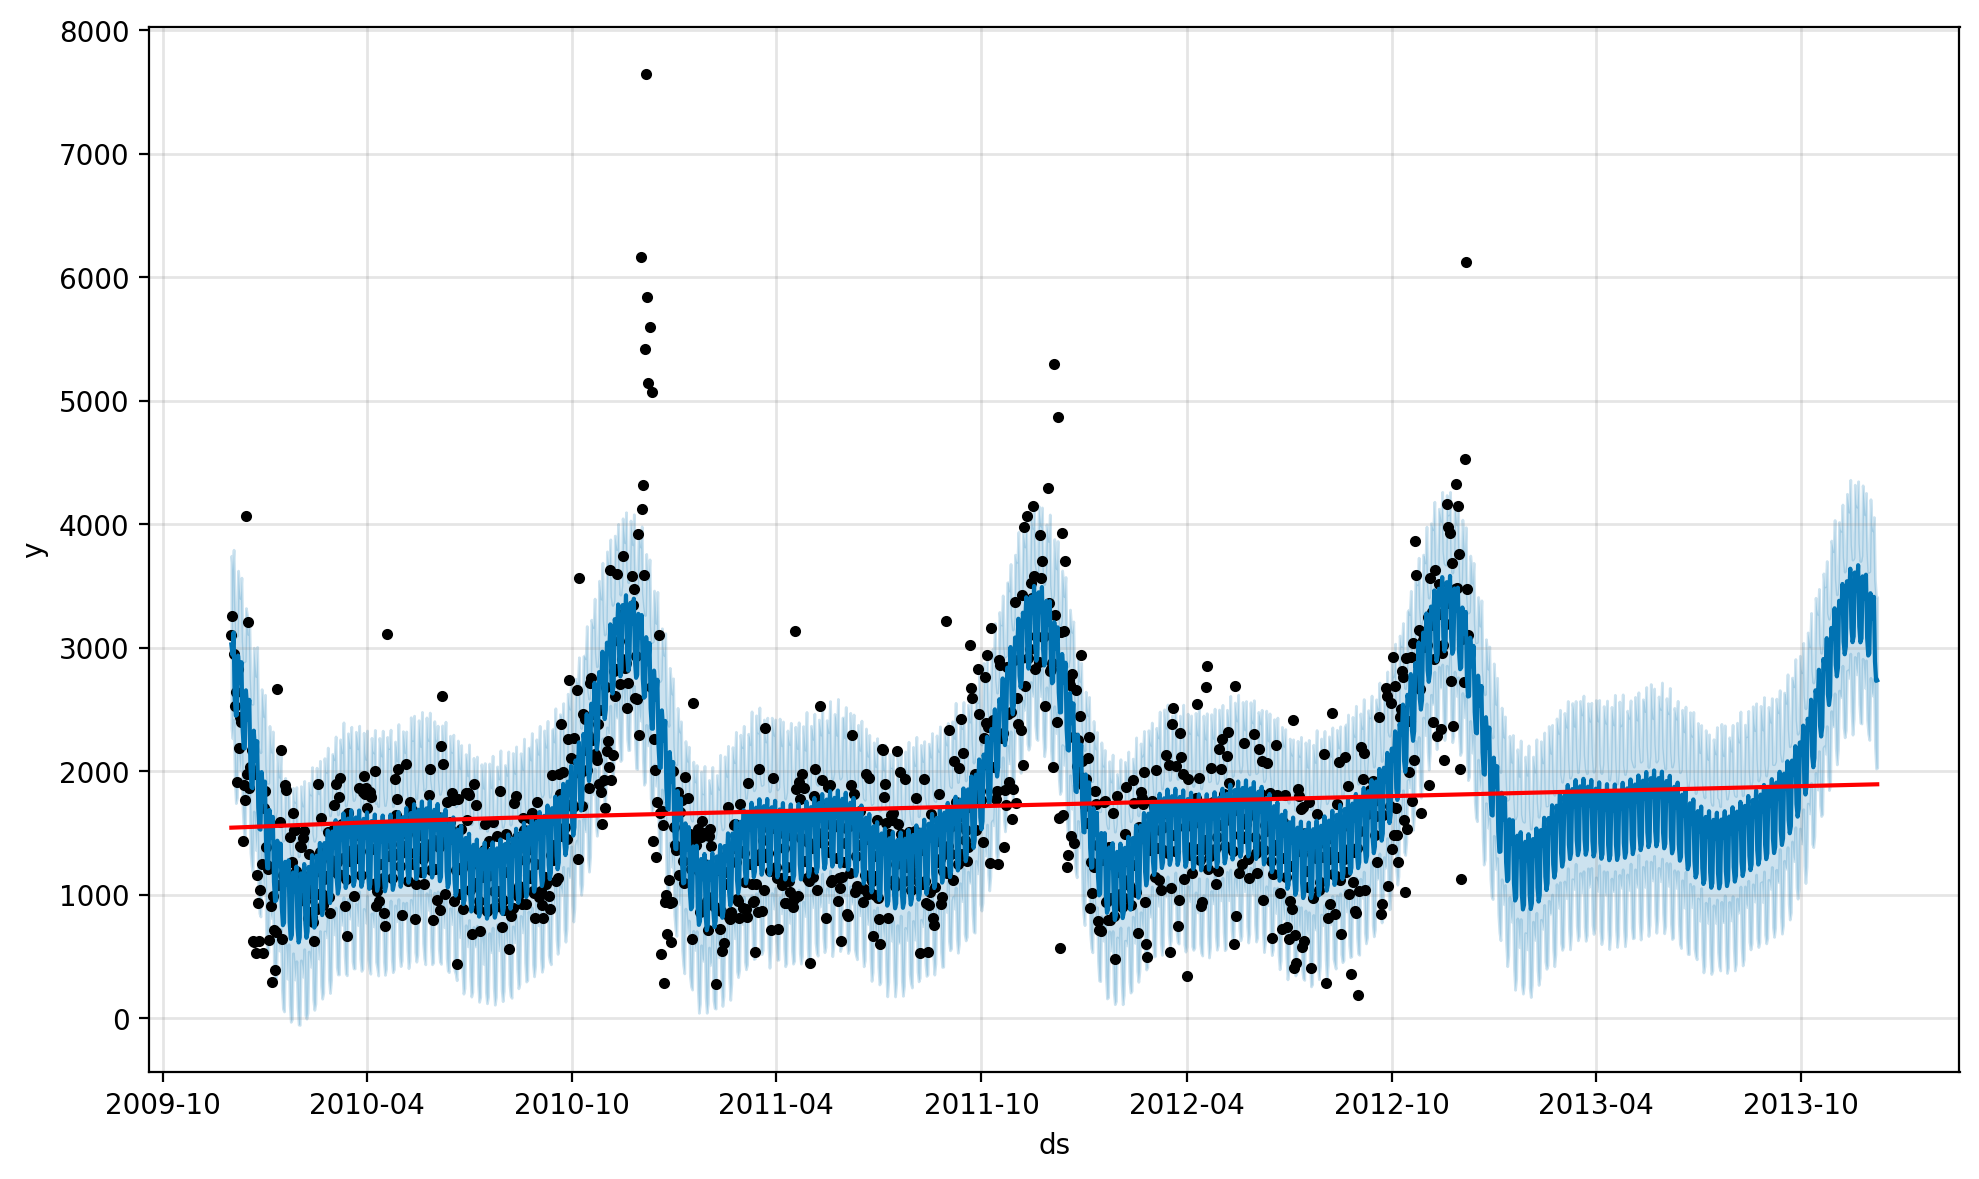

In [3]:
# строим модель и визуализируем прогнозы
model = Prophet(yearly_seasonality=4)
model.fit(df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)
fig = model.plot(forecast)
add_changepoints_to_plot(fig.gca(), model, forecast)
plt.show()

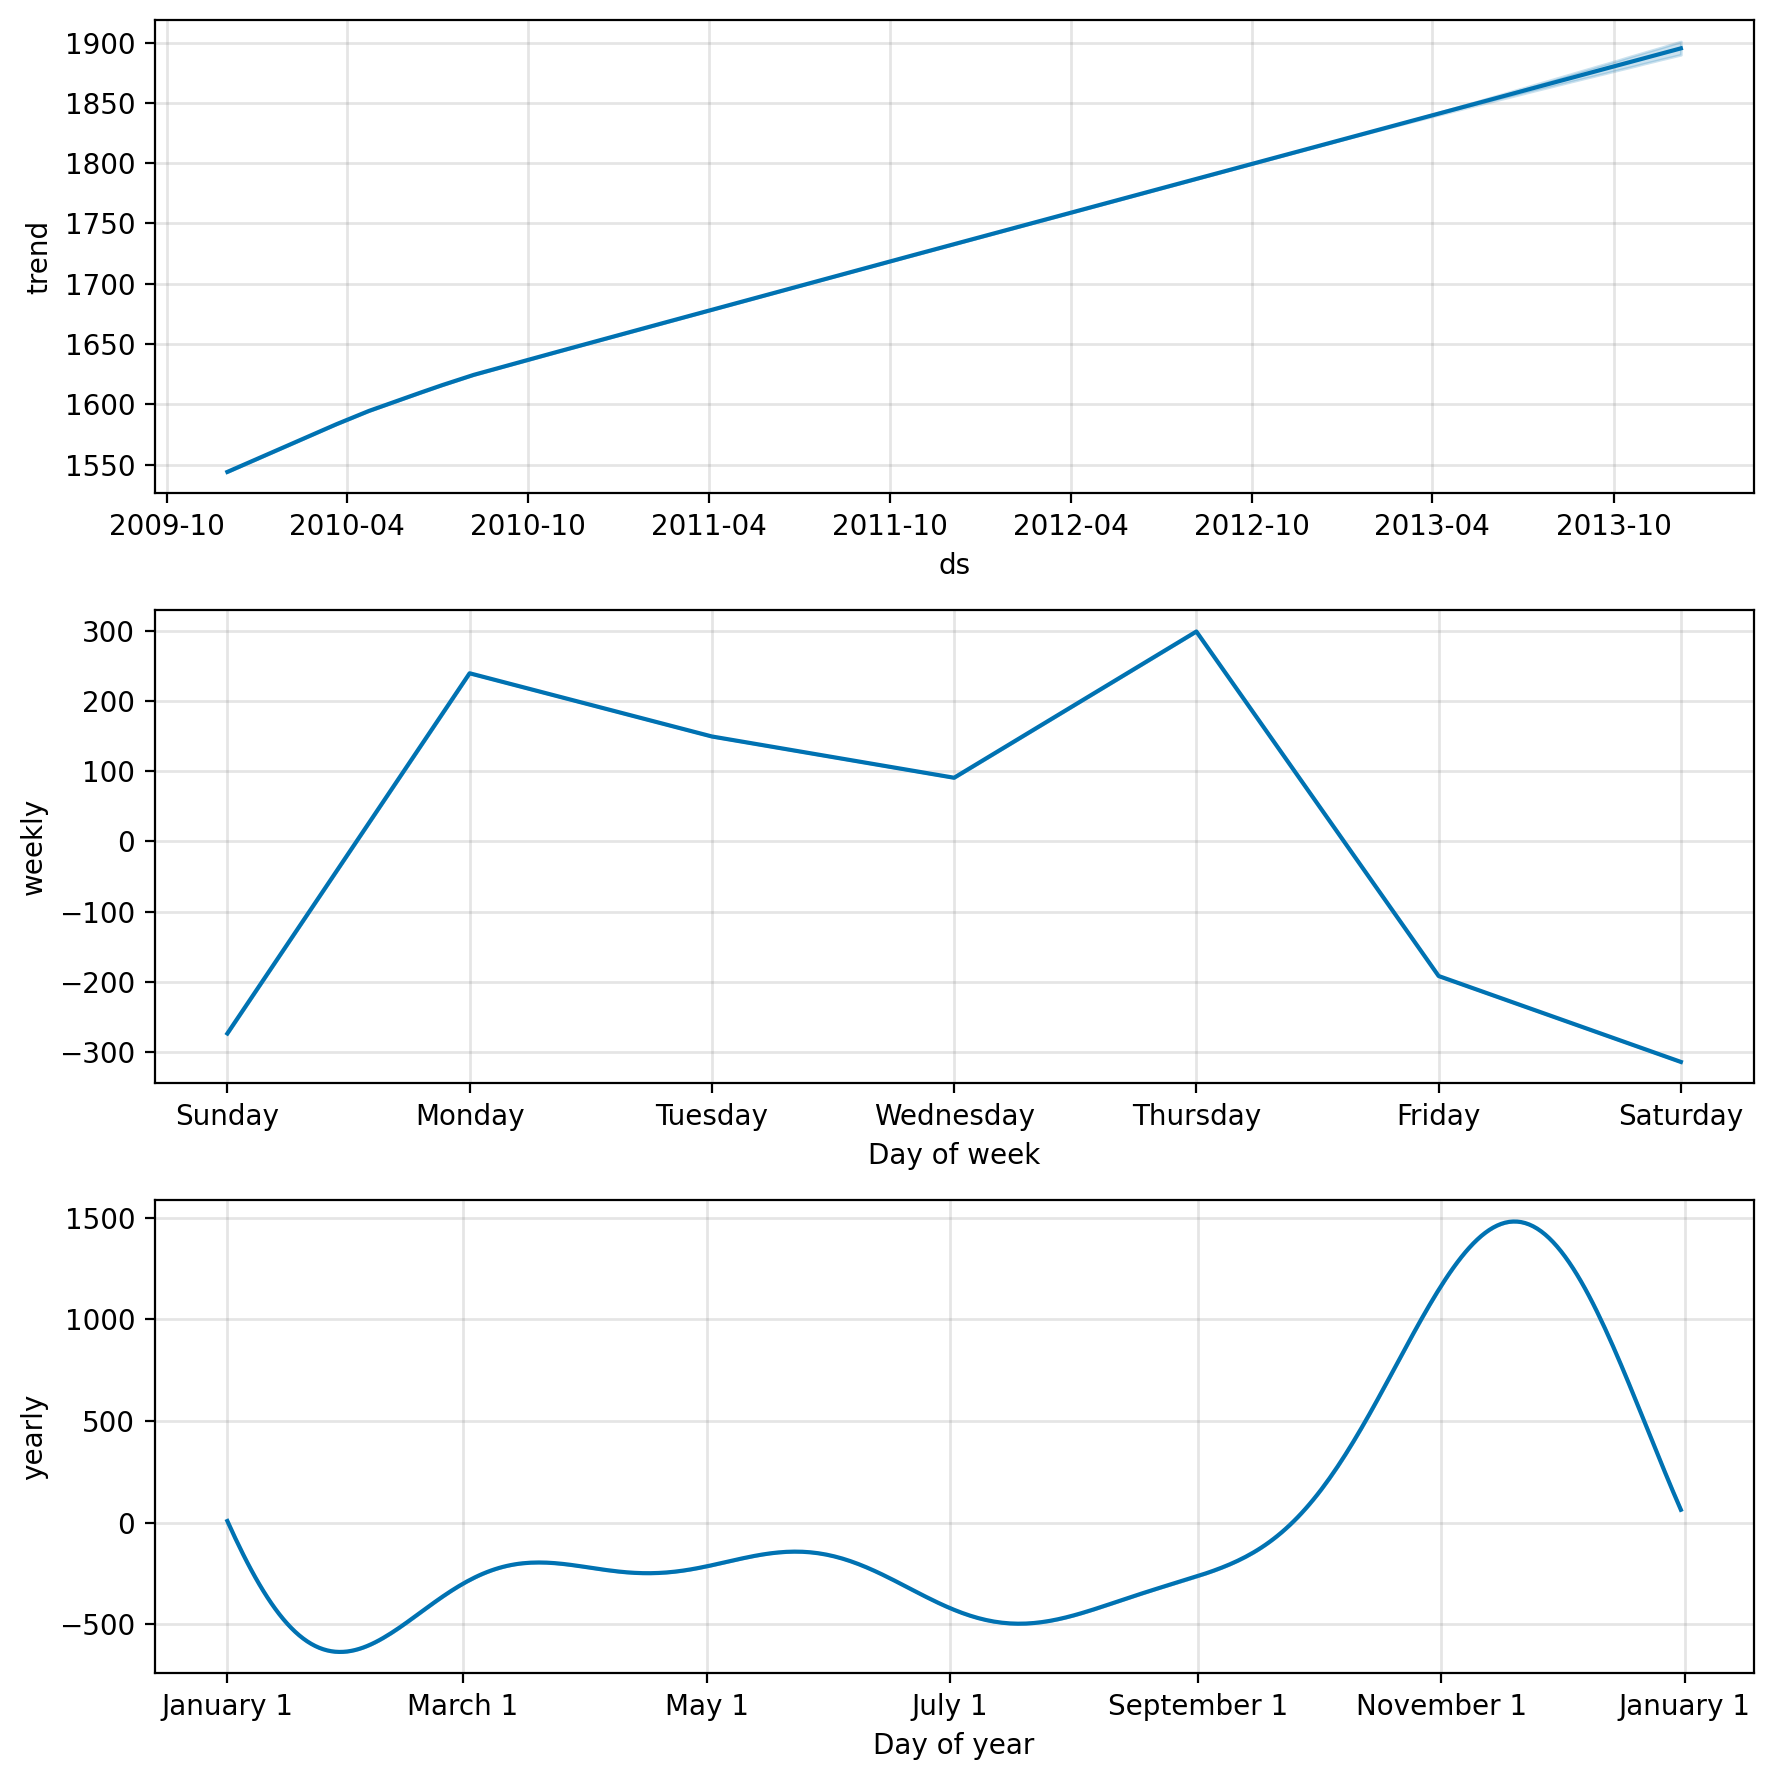

In [4]:
# смотрим графики компонент
fig2 = model.plot_components(forecast)
plt.show()

In [5]:
# импортируем функцию перекрестной проверки
from prophet.diagnostics import cross_validation

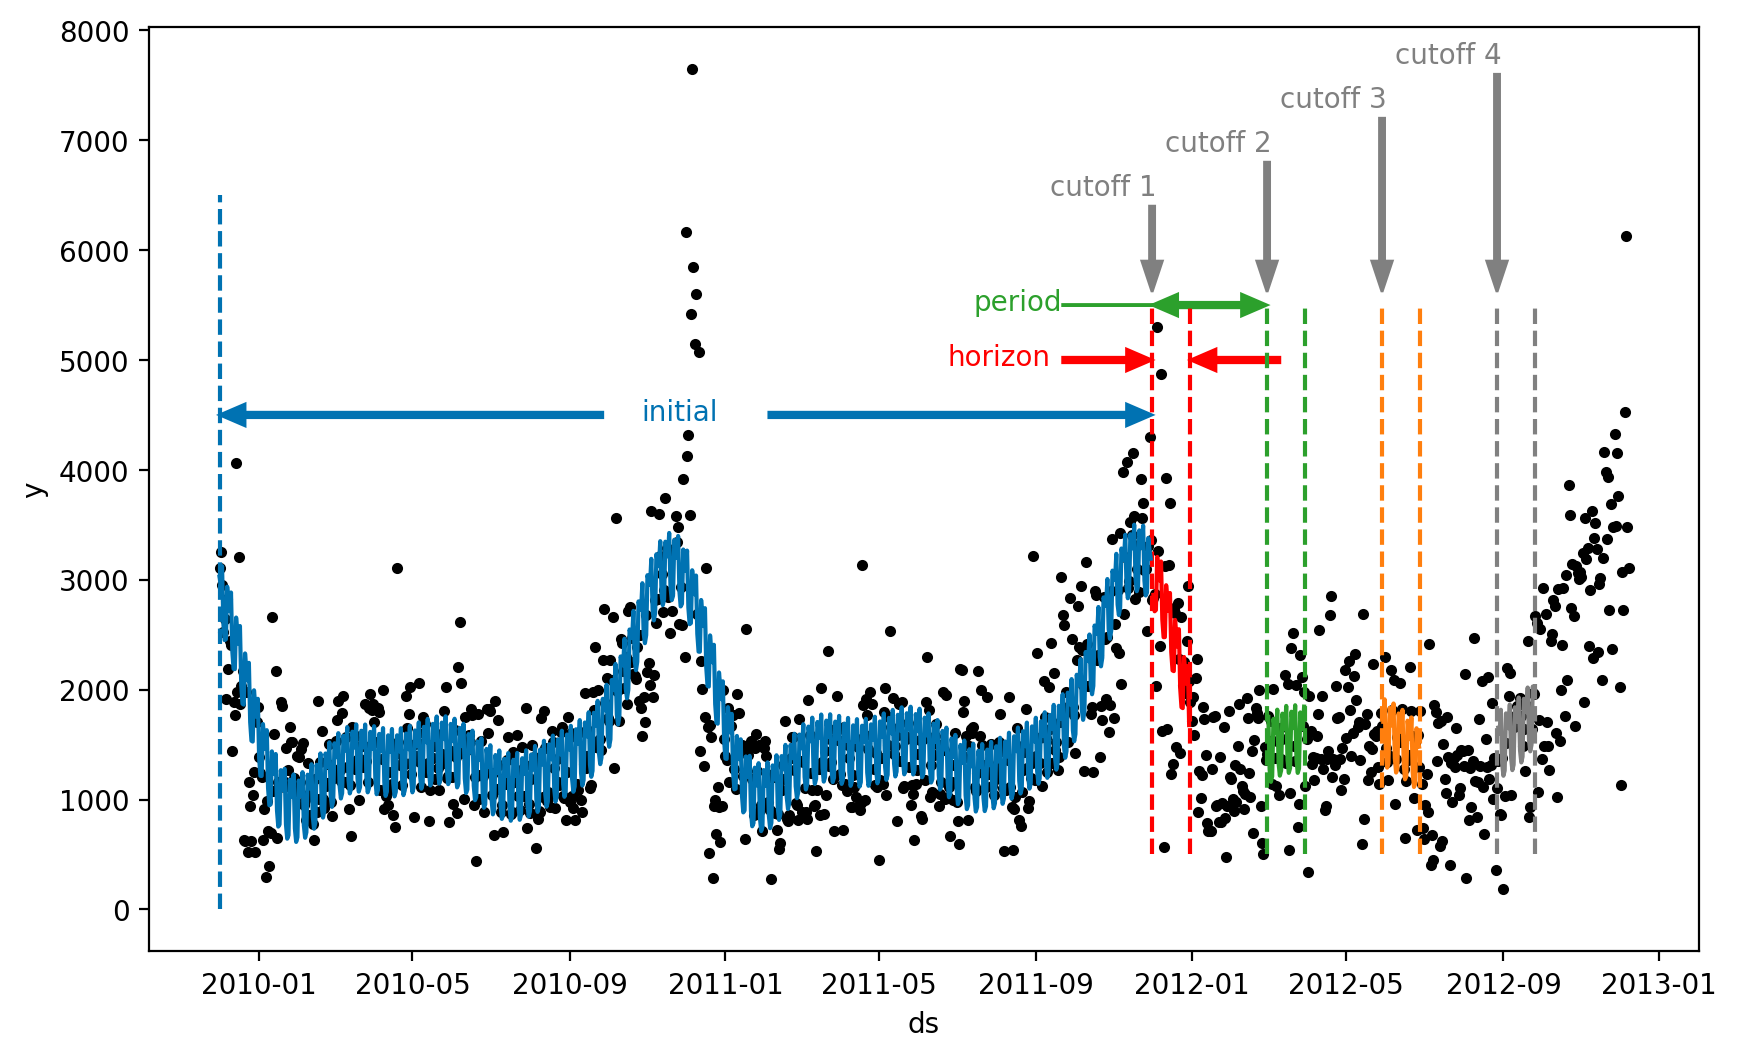

In [6]:
# визуализируем схему перекрестной проверки в Prophet
plt.figure(figsize=(10, 6))
plt.plot(df['ds'], df['y'], 'k.')
plt.vlines([df['ds'][730], df['ds'][760]], 500, 5500, 
           colors='r', linestyles='--')
plt.vlines([df['ds'][820], df['ds'][850]], 500, 5500, 
           colors='tab:green', linestyles='--')
plt.vlines([df['ds'][910], df['ds'][940]], 500, 5500, 
           colors='tab:orange', linestyles='--')
plt.vlines([df['ds'][1000], df['ds'][1030]], 500, 5500, 
           colors='gray', linestyles='--')
plt.vlines([df['ds'][0]], 0, 6500, colors='#0072B2', 
           linestyles='--')

plt.plot(forecast[forecast['ds'] < df['ds'][730]]['ds'],
         forecast[forecast['ds'] < df['ds'][730]]['yhat'],
         c='#0072B2')

plt.plot(forecast[(forecast['ds'] < df['ds'][760]) &
                  (forecast['ds'] > df['ds'][730])]['ds'],
         forecast[(forecast['ds'] < df['ds'][760]) &
                  (forecast['ds'] > df['ds'][730])]['yhat'], 
         c='r')

plt.plot(forecast[(forecast['ds'] < df['ds'][850]) &
                  (forecast['ds'] > df['ds'][820])]['ds'],
         forecast[(forecast['ds'] < df['ds'][850]) &
                  (forecast['ds'] > df['ds'][820])]['yhat'], 
         c='tab:green')

plt.plot(forecast[(forecast['ds'] < df['ds'][940]) &
                  (forecast['ds'] > df['ds'][910])]['ds'],
         forecast[(forecast['ds'] < df['ds'][940]) &
                  (forecast['ds'] > df['ds'][910])]['yhat'], 
         c='tab:orange')

plt.plot(forecast[(forecast['ds'] < df['ds'][1030]) &
                  (forecast['ds'] > df['ds'][1000])]['ds'],
         forecast[(forecast['ds'] < df['ds'][1030]) &
                  (forecast['ds'] > df['ds'][1000])]['yhat'], 
         c='gray')

plt.arrow(df['ds'][660], 5000, 50, 0, width=50, 
          head_width=200, head_length=20, color='r')
plt.arrow(df['ds'][830], 5000, -50, 0, width=50, 
          head_width=200, head_length=20, color='r')
plt.text(df['ds'][570], 4950, 'horizon', color='r')

plt.arrow(df['ds'][660], 5500, 140, 0, width=10, 
          head_width=200, head_length=20, color='tab:green')
plt.arrow(df['ds'][800], 5500, -50, 0, width=50, 
          head_width=200, head_length=20, color='tab:green')
plt.text(df['ds'][590], 5450, 'period', color='tab:green')

plt.arrow(df['ds'][730], 6400, 0, -500, width=4, 
          head_width=16, head_length=280, color='gray')
plt.text(df['ds'][650], 6500, 'cutoff 1', color='gray')

plt.arrow(df['ds'][820], 6800, 0, -900, width=4, 
          head_width=16, head_length=280, color='gray')
plt.text(df['ds'][740], 6900, 'cutoff 2', color='gray')

plt.arrow(df['ds'][910], 7200, 0, -1300, width=4, 
          head_width=16, head_length=280, color='gray')
plt.text(df['ds'][830], 7300, 'cutoff 3', color='gray')

plt.arrow(df['ds'][1000], 7600, 0, -1700, width=4, 
          head_width=16, head_length=280, color='gray')
plt.text(df['ds'][920], 7700, 'cutoff 4', color='gray')

plt.arrow(df['ds'][300], 4500, -280, 0, width=50, 
          head_width=200, head_length=20, color='#0072B2')
plt.arrow(df['ds'][430], 4500, 280, 0, width=50, 
          head_width=200, head_length=20, color='#0072B2')
plt.text(df['ds'][330], 4450, 'initial', color='#0072B2')

plt.xlabel('ds')
plt.ylabel('y')

plt.show()

In [7]:
%%time

# создаем датафрейм перекрестной проверки
df_cv = cross_validation(model,
                         horizon='90 days',
                         period='30 days',
                         initial='730 days')

  0%|          | 0/10 [00:00<?, ?it/s]

22:28:35 - cmdstanpy - INFO - Chain [1] start processing
22:28:35 - cmdstanpy - INFO - Chain [1] done processing
22:28:36 - cmdstanpy - INFO - Chain [1] start processing
22:28:36 - cmdstanpy - INFO - Chain [1] done processing
22:28:37 - cmdstanpy - INFO - Chain [1] start processing
22:28:37 - cmdstanpy - INFO - Chain [1] done processing
22:28:38 - cmdstanpy - INFO - Chain [1] start processing
22:28:38 - cmdstanpy - INFO - Chain [1] done processing
22:28:39 - cmdstanpy - INFO - Chain [1] start processing
22:28:39 - cmdstanpy - INFO - Chain [1] done processing
22:28:41 - cmdstanpy - INFO - Chain [1] start processing
22:28:41 - cmdstanpy - INFO - Chain [1] done processing
22:28:42 - cmdstanpy - INFO - Chain [1] start processing
22:28:42 - cmdstanpy - INFO - Chain [1] done processing
22:28:43 - cmdstanpy - INFO - Chain [1] start processing
22:28:43 - cmdstanpy - INFO - Chain [1] done processing
22:28:44 - cmdstanpy - INFO - Chain [1] start processing
22:28:44 - cmdstanpy - INFO - Chain [1]

CPU times: user 10.1 s, sys: 293 ms, total: 10.4 s
Wall time: 10.9 s


In [8]:
# взглянем на первые 5 наблюдений датафрейма
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2011-12-15,2801.279508,2093.432462,3552.004274,3702.986147,2011-12-14
1,2011-12-16,2352.392663,1628.084406,3062.971122,1229.263629,2011-12-14
2,2011-12-17,2182.444567,1447.502117,2863.796845,1325.415023,2011-12-14
3,2011-12-18,2165.531644,1483.190314,2880.950186,2739.454215,2011-12-14
4,2011-12-19,2636.215361,1917.746440,3374.980675,2699.823386,2011-12-14


In [9]:
%%time

# распараллеливаем перекрестную проверку
df_cv = cross_validation(model,
                         horizon='90 days',
                         period='30 days',
                         initial='730 days',
                         parallel='processes')

22:28:48 - cmdstanpy - INFO - Chain [1] start processing
22:28:48 - cmdstanpy - INFO - Chain [1] start processing
22:28:48 - cmdstanpy - INFO - Chain [1] start processing
22:28:48 - cmdstanpy - INFO - Chain [1] start processing
22:28:48 - cmdstanpy - INFO - Chain [1] start processing
22:28:48 - cmdstanpy - INFO - Chain [1] start processing
22:28:48 - cmdstanpy - INFO - Chain [1] start processing
22:28:48 - cmdstanpy - INFO - Chain [1] start processing
22:28:48 - cmdstanpy - INFO - Chain [1] start processing
22:28:48 - cmdstanpy - INFO - Chain [1] done processing
22:28:48 - cmdstanpy - INFO - Chain [1] done processing
22:28:48 - cmdstanpy - INFO - Chain [1] start processing
22:28:48 - cmdstanpy - INFO - Chain [1] done processing
22:28:48 - cmdstanpy - INFO - Chain [1] done processing
22:28:48 - cmdstanpy - INFO - Chain [1] done processing
22:28:48 - cmdstanpy - INFO - Chain [1] done processing
22:28:48 - cmdstanpy - INFO - Chain [1] done processing
22:28:48 - cmdstanpy - INFO - Chain [1

CPU times: user 57.4 ms, sys: 123 ms, total: 181 ms
Wall time: 3.81 s


In [10]:
# импортируем функцию performance_metrics()
from prophet.diagnostics import performance_metrics

In [11]:
# вычисляем метрики качества для прогнозов
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,9 days,221848.491863,471.007953,379.709437,0.300932,0.231808,0.258590,0.866667
1,10 days,218308.515052,467.234968,375.331735,0.297815,0.221872,0.256063,0.877778
2,11 days,203126.303745,450.695356,368.604504,0.288048,0.201402,0.251184,0.900000
3,12 days,179356.523772,423.505046,351.016986,0.274050,0.207643,0.241106,0.933333
4,13 days,173294.771719,416.286886,344.754187,0.261167,0.190642,0.234392,0.944444


In [12]:
# импортируем функцию plot_cross_validation_metric
from prophet.plot import plot_cross_validation_metric

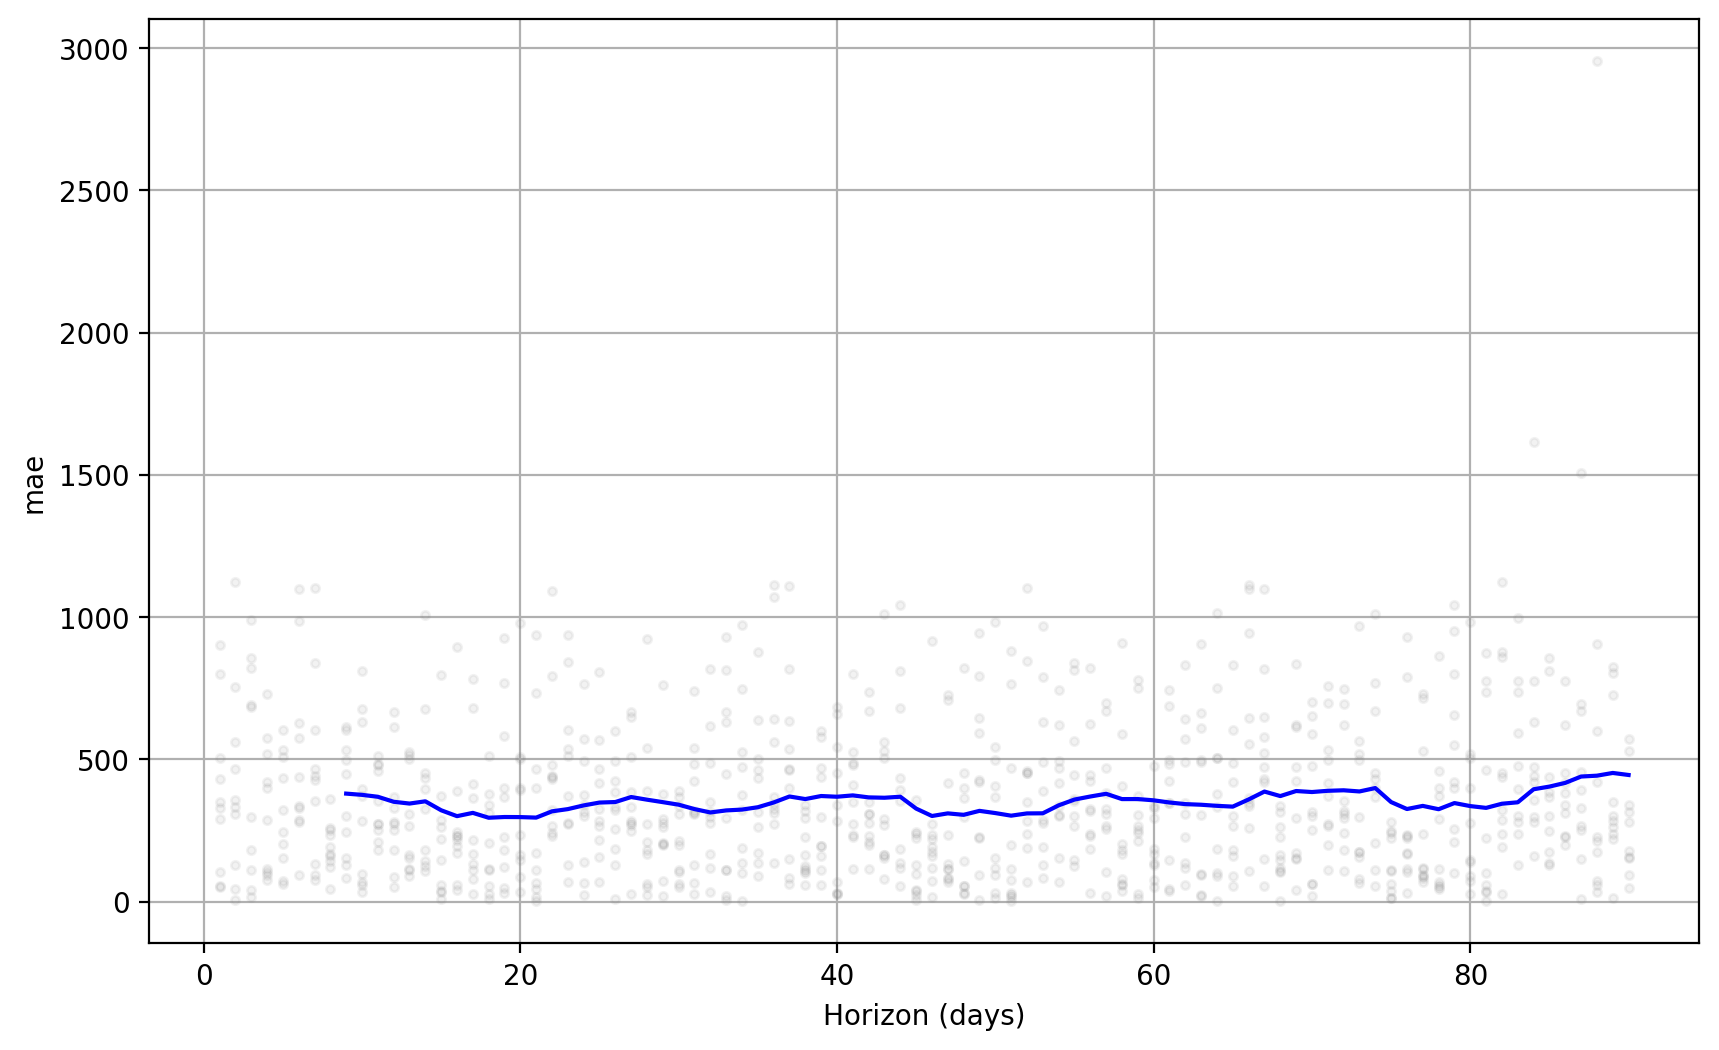

In [13]:
# визуализируем MAE
fig = plot_cross_validation_metric(df_cv, metric='mae')
plt.show()

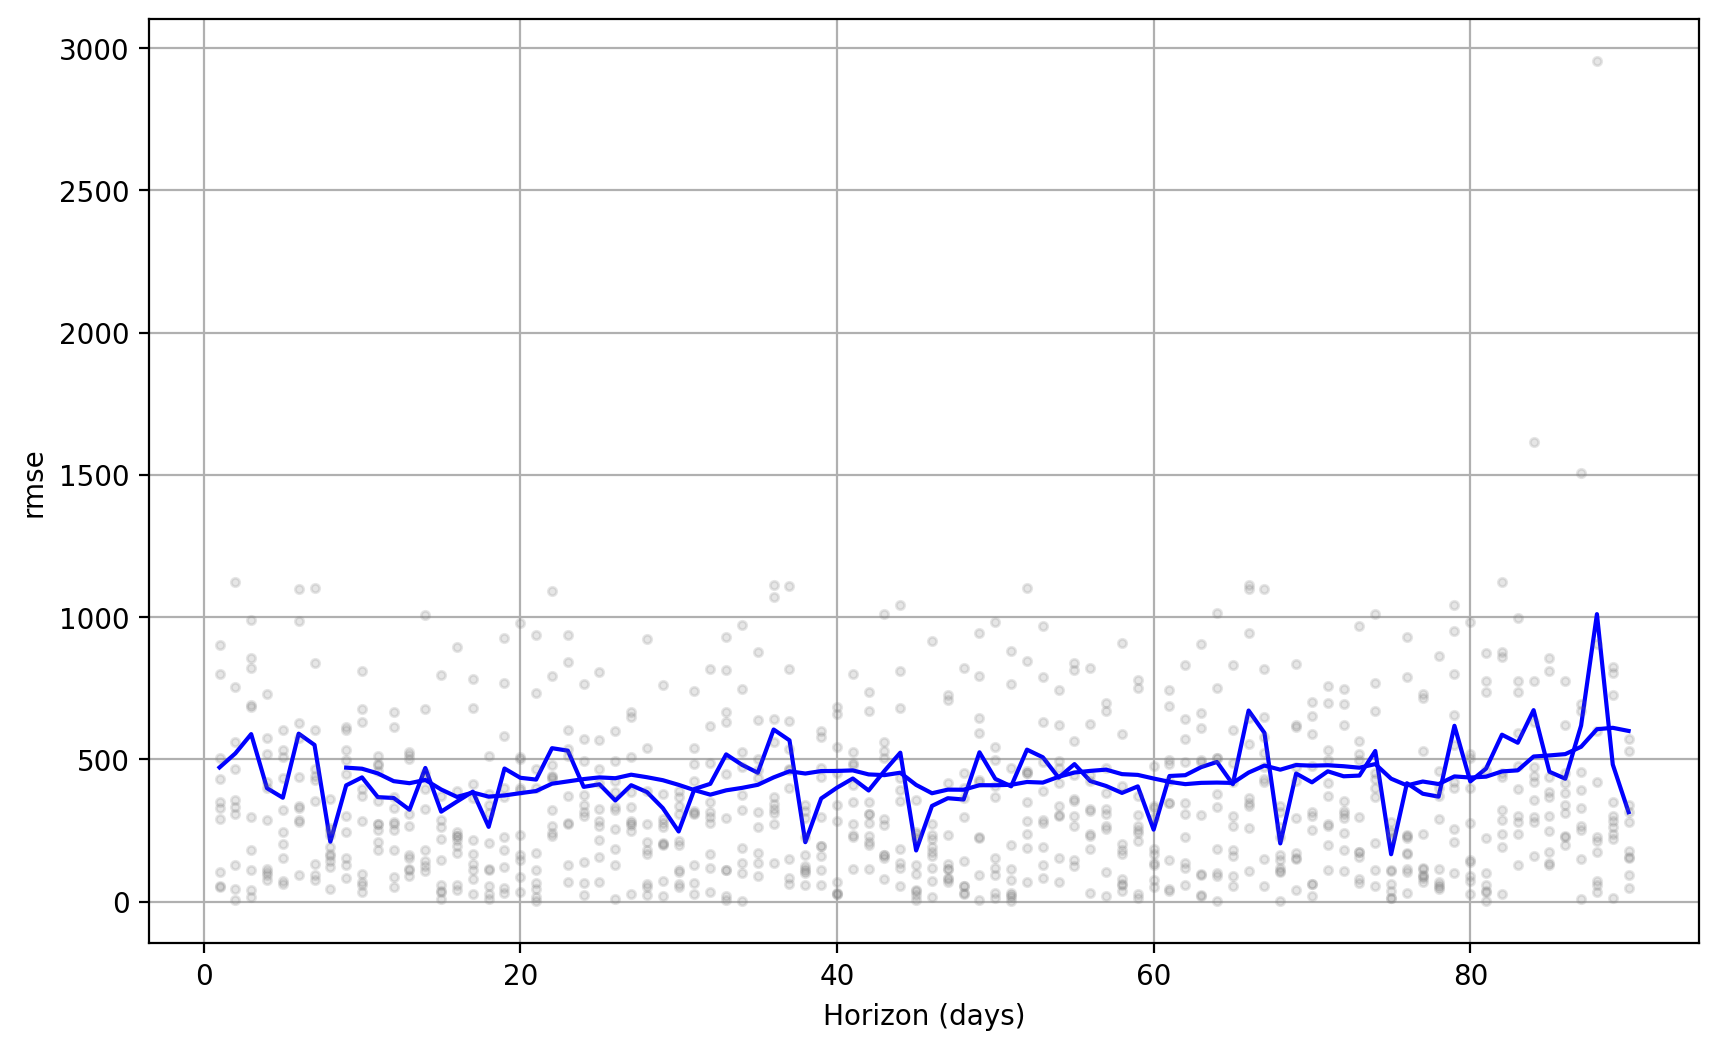

In [14]:
# строим два графика RMSE с разной шириной окна
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
plot_cross_validation_metric(df_cv,
                             metric='rmse',
                             rolling_window=.01,
                             ax=ax)
plot_cross_validation_metric(df_cv,
                             metric='rmse',
                             rolling_window=.1,
                             ax=ax)
plt.show()

22:28:51 - cmdstanpy - INFO - Chain [1] start processing
22:28:51 - cmdstanpy - INFO - Chain [1] done processing


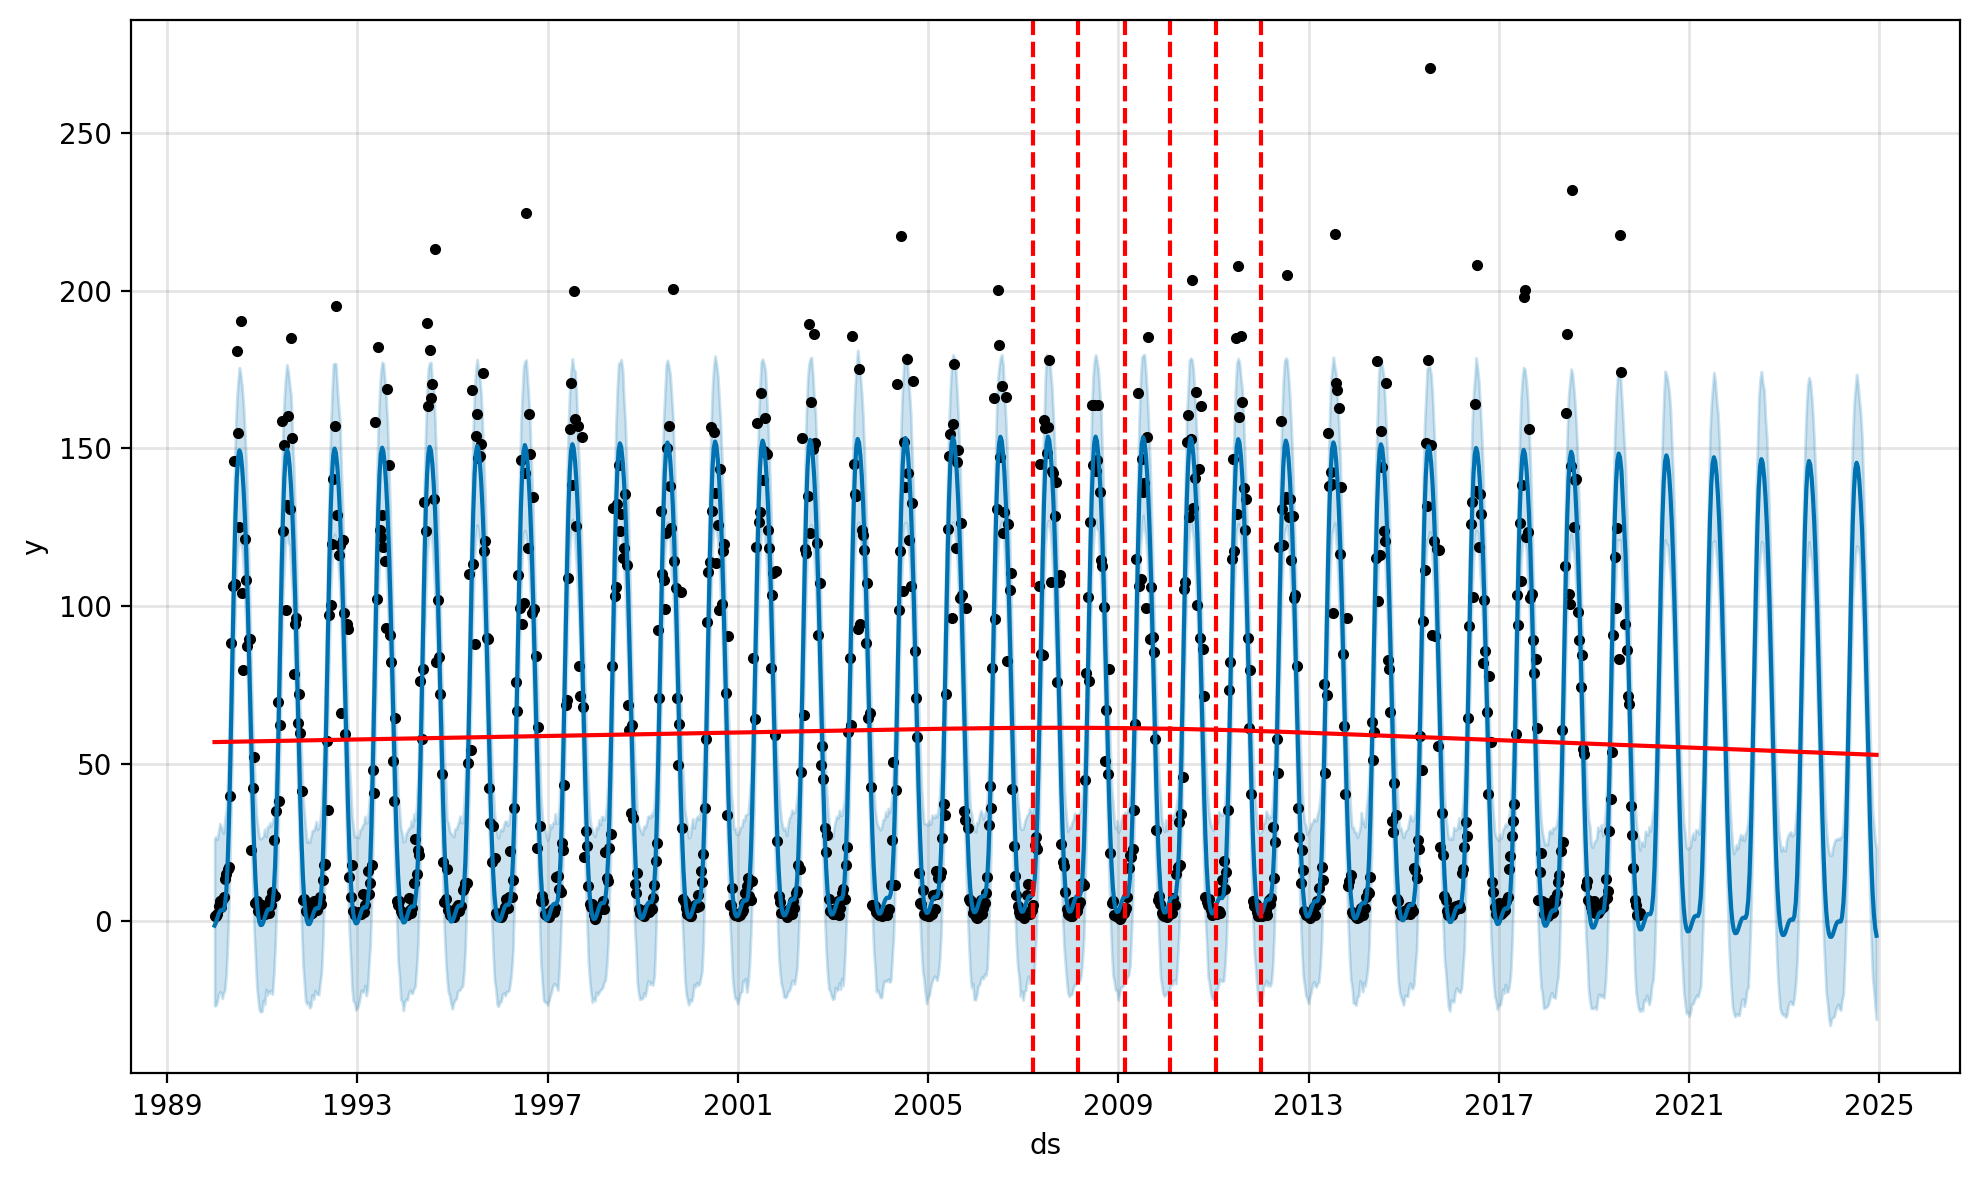

In [15]:
# загружаем данные
df = pd.read_csv('Data/rainfall.csv')
df.columns = ['ds', 'y']

# обучаем модель и визуализируем прогнозы
model = Prophet(yearly_seasonality=4)
model.fit(df)
future = model.make_future_dataframe(periods=365 * 5)
future = future[future['ds'].dt.day.isin([1, 11, 21])]
forecast = model.predict(future)
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)
plt.show()

22:28:55 - cmdstanpy - INFO - Chain [1] start processing
22:28:55 - cmdstanpy - INFO - Chain [1] start processing
22:28:55 - cmdstanpy - INFO - Chain [1] start processing
22:28:55 - cmdstanpy - INFO - Chain [1] start processing
22:28:55 - cmdstanpy - INFO - Chain [1] start processing
22:28:55 - cmdstanpy - INFO - Chain [1] done processing
22:28:55 - cmdstanpy - INFO - Chain [1] done processing
22:28:55 - cmdstanpy - INFO - Chain [1] done processing
22:28:55 - cmdstanpy - INFO - Chain [1] done processing
22:28:55 - cmdstanpy - INFO - Chain [1] done processing
22:28:55 - cmdstanpy - INFO - Chain [1] start processing
22:28:55 - cmdstanpy - INFO - Chain [1] start processing
22:28:55 - cmdstanpy - INFO - Chain [1] done processing
22:28:55 - cmdstanpy - INFO - Chain [1] start processing
22:28:55 - cmdstanpy - INFO - Chain [1] start processing
22:28:55 - cmdstanpy - INFO - Chain [1] start processing
22:28:55 - cmdstanpy - INFO - Chain [1] done processing
22:28:55 - cmdstanpy - INFO - Chain [1

22:29:05 - cmdstanpy - INFO - Chain [1] done processing
22:29:05 - cmdstanpy - INFO - Chain [1] start processing
22:29:05 - cmdstanpy - INFO - Chain [1] done processing
22:29:07 - cmdstanpy - INFO - Chain [1] start processing
22:29:07 - cmdstanpy - INFO - Chain [1] start processing
22:29:07 - cmdstanpy - INFO - Chain [1] start processing
22:29:07 - cmdstanpy - INFO - Chain [1] start processing
22:29:07 - cmdstanpy - INFO - Chain [1] done processing
22:29:08 - cmdstanpy - INFO - Chain [1] done processing
22:29:08 - cmdstanpy - INFO - Chain [1] done processing
22:29:08 - cmdstanpy - INFO - Chain [1] start processing
22:29:08 - cmdstanpy - INFO - Chain [1] done processing
22:29:08 - cmdstanpy - INFO - Chain [1] start processing
22:29:08 - cmdstanpy - INFO - Chain [1] start processing
22:29:08 - cmdstanpy - INFO - Chain [1] start processing
22:29:08 - cmdstanpy - INFO - Chain [1] start processing
22:29:08 - cmdstanpy - INFO - Chain [1] done processing
22:29:08 - cmdstanpy - INFO - Chain [1

22:29:19 - cmdstanpy - INFO - Chain [1] start processing
22:29:19 - cmdstanpy - INFO - Chain [1] done processing
22:29:19 - cmdstanpy - INFO - Chain [1] done processing
22:29:19 - cmdstanpy - INFO - Chain [1] start processing
22:29:19 - cmdstanpy - INFO - Chain [1] done processing
22:29:19 - cmdstanpy - INFO - Chain [1] done processing
22:29:19 - cmdstanpy - INFO - Chain [1] start processing
22:29:19 - cmdstanpy - INFO - Chain [1] start processing
22:29:19 - cmdstanpy - INFO - Chain [1] done processing
22:29:19 - cmdstanpy - INFO - Chain [1] done processing
22:29:19 - cmdstanpy - INFO - Chain [1] start processing
22:29:19 - cmdstanpy - INFO - Chain [1] done processing
22:29:22 - cmdstanpy - INFO - Chain [1] start processing
22:29:22 - cmdstanpy - INFO - Chain [1] done processing
22:29:22 - cmdstanpy - INFO - Chain [1] start processing
22:29:22 - cmdstanpy - INFO - Chain [1] start processing
22:29:22 - cmdstanpy - INFO - Chain [1] start processing
22:29:22 - cmdstanpy - INFO - Chain [1]

22:29:36 - cmdstanpy - INFO - Chain [1] done processing
22:29:36 - cmdstanpy - INFO - Chain [1] done processing
22:29:36 - cmdstanpy - INFO - Chain [1] start processing
22:29:36 - cmdstanpy - INFO - Chain [1] start processing
22:29:36 - cmdstanpy - INFO - Chain [1] start processing
22:29:36 - cmdstanpy - INFO - Chain [1] done processing
22:29:36 - cmdstanpy - INFO - Chain [1] start processing
22:29:36 - cmdstanpy - INFO - Chain [1] start processing
22:29:36 - cmdstanpy - INFO - Chain [1] done processing
22:29:36 - cmdstanpy - INFO - Chain [1] done processing
22:29:36 - cmdstanpy - INFO - Chain [1] done processing
22:29:36 - cmdstanpy - INFO - Chain [1] done processing
22:29:36 - cmdstanpy - INFO - Chain [1] done processing
22:29:37 - cmdstanpy - INFO - Chain [1] start processing
22:29:37 - cmdstanpy - INFO - Chain [1] start processing
22:29:37 - cmdstanpy - INFO - Chain [1] done processing
22:29:37 - cmdstanpy - INFO - Chain [1] done processing
22:29:37 - cmdstanpy - INFO - Chain [1] s

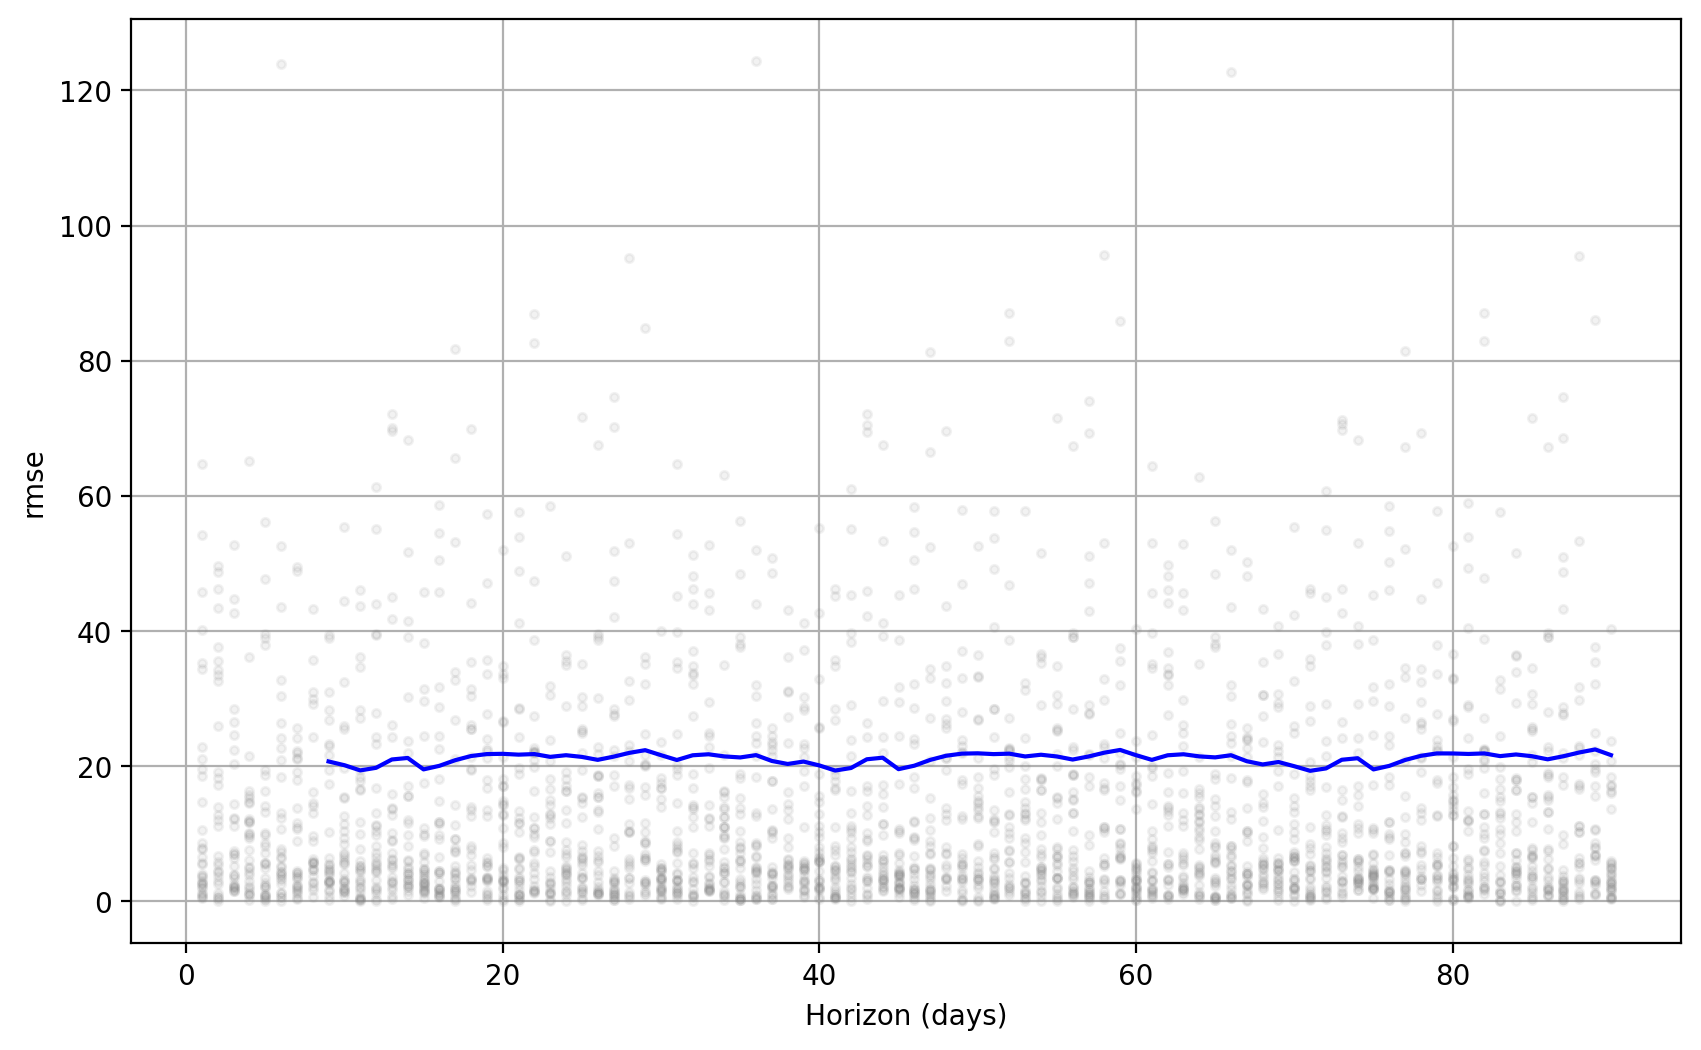

In [16]:
# выполняем перекрестную проверку
df_cv = cross_validation(model,
                         horizon='90 days',
                         period='30 days',
                         initial='1826 days',
                         parallel='processes')
df_p = performance_metrics(df_cv)
# визуализируем RMSE
fig = plot_cross_validation_metric(df_cv, metric='rmse')
plt.show()

In [17]:
# создаем пользовательский список пороговых точек
cutoffs = [pd.Timestamp('{}-{}-{}'.format(year, month, day))
           for year in range(2005, 2019)
           for month in range(1, 13)
           for day in [1, 11, 21]]

22:30:03 - cmdstanpy - INFO - Chain [1] start processing
22:30:03 - cmdstanpy - INFO - Chain [1] start processing
22:30:03 - cmdstanpy - INFO - Chain [1] start processing
22:30:03 - cmdstanpy - INFO - Chain [1] start processing
22:30:03 - cmdstanpy - INFO - Chain [1] start processing
22:30:03 - cmdstanpy - INFO - Chain [1] start processing
22:30:03 - cmdstanpy - INFO - Chain [1] start processing
22:30:03 - cmdstanpy - INFO - Chain [1] start processing
22:30:03 - cmdstanpy - INFO - Chain [1] start processing
22:30:03 - cmdstanpy - INFO - Chain [1] start processing
22:30:03 - cmdstanpy - INFO - Chain [1] start processing
22:30:03 - cmdstanpy - INFO - Chain [1] start processing
22:30:03 - cmdstanpy - INFO - Chain [1] start processing
22:30:03 - cmdstanpy - INFO - Chain [1] start processing
22:30:03 - cmdstanpy - INFO - Chain [1] start processing
22:30:03 - cmdstanpy - INFO - Chain [1] done processing
22:30:03 - cmdstanpy - INFO - Chain [1] start processing
22:30:03 - cmdstanpy - INFO - Ch

22:30:20 - cmdstanpy - INFO - Chain [1] done processing
22:30:20 - cmdstanpy - INFO - Chain [1] start processing
22:30:20 - cmdstanpy - INFO - Chain [1] done processing
22:30:20 - cmdstanpy - INFO - Chain [1] done processing
22:30:24 - cmdstanpy - INFO - Chain [1] start processing
22:30:24 - cmdstanpy - INFO - Chain [1] start processing
22:30:24 - cmdstanpy - INFO - Chain [1] start processing
22:30:24 - cmdstanpy - INFO - Chain [1] done processing
22:30:24 - cmdstanpy - INFO - Chain [1] done processing
22:30:24 - cmdstanpy - INFO - Chain [1] done processing
22:30:24 - cmdstanpy - INFO - Chain [1] start processing
22:30:24 - cmdstanpy - INFO - Chain [1] start processing
22:30:24 - cmdstanpy - INFO - Chain [1] start processing
22:30:24 - cmdstanpy - INFO - Chain [1] start processing
22:30:24 - cmdstanpy - INFO - Chain [1] start processing
22:30:24 - cmdstanpy - INFO - Chain [1] start processing
22:30:24 - cmdstanpy - INFO - Chain [1] done processing
22:30:24 - cmdstanpy - INFO - Chain [1

22:30:41 - cmdstanpy - INFO - Chain [1] start processing
22:30:41 - cmdstanpy - INFO - Chain [1] done processing
22:30:41 - cmdstanpy - INFO - Chain [1] start processing
22:30:41 - cmdstanpy - INFO - Chain [1] done processing
22:30:41 - cmdstanpy - INFO - Chain [1] done processing
22:30:41 - cmdstanpy - INFO - Chain [1] done processing
22:30:41 - cmdstanpy - INFO - Chain [1] start processing
22:30:41 - cmdstanpy - INFO - Chain [1] start processing
22:30:41 - cmdstanpy - INFO - Chain [1] start processing
22:30:41 - cmdstanpy - INFO - Chain [1] start processing
22:30:41 - cmdstanpy - INFO - Chain [1] done processing
22:30:41 - cmdstanpy - INFO - Chain [1] done processing
22:30:41 - cmdstanpy - INFO - Chain [1] done processing
22:30:41 - cmdstanpy - INFO - Chain [1] done processing
22:30:45 - cmdstanpy - INFO - Chain [1] start processing
22:30:45 - cmdstanpy - INFO - Chain [1] start processing
22:30:45 - cmdstanpy - INFO - Chain [1] start processing
22:30:45 - cmdstanpy - INFO - Chain [1]

22:31:03 - cmdstanpy - INFO - Chain [1] done processing
22:31:03 - cmdstanpy - INFO - Chain [1] start processing
22:31:03 - cmdstanpy - INFO - Chain [1] done processing
22:31:03 - cmdstanpy - INFO - Chain [1] done processing
22:31:03 - cmdstanpy - INFO - Chain [1] start processing
22:31:03 - cmdstanpy - INFO - Chain [1] done processing
22:31:03 - cmdstanpy - INFO - Chain [1] done processing
22:31:04 - cmdstanpy - INFO - Chain [1] start processing
22:31:04 - cmdstanpy - INFO - Chain [1] done processing
22:31:04 - cmdstanpy - INFO - Chain [1] done processing
22:31:04 - cmdstanpy - INFO - Chain [1] start processing
22:31:04 - cmdstanpy - INFO - Chain [1] start processing
22:31:04 - cmdstanpy - INFO - Chain [1] start processing
22:31:04 - cmdstanpy - INFO - Chain [1] done processing
22:31:04 - cmdstanpy - INFO - Chain [1] start processing
22:31:04 - cmdstanpy - INFO - Chain [1] start processing
22:31:04 - cmdstanpy - INFO - Chain [1] done processing
22:31:04 - cmdstanpy - INFO - Chain [1] 

22:31:23 - cmdstanpy - INFO - Chain [1] done processing
22:31:23 - cmdstanpy - INFO - Chain [1] done processing
22:31:23 - cmdstanpy - INFO - Chain [1] start processing
22:31:23 - cmdstanpy - INFO - Chain [1] done processing
22:31:26 - cmdstanpy - INFO - Chain [1] start processing
22:31:26 - cmdstanpy - INFO - Chain [1] start processing
22:31:26 - cmdstanpy - INFO - Chain [1] start processing
22:31:26 - cmdstanpy - INFO - Chain [1] start processing
22:31:26 - cmdstanpy - INFO - Chain [1] start processing
22:31:26 - cmdstanpy - INFO - Chain [1] start processing
22:31:26 - cmdstanpy - INFO - Chain [1] done processing
22:31:26 - cmdstanpy - INFO - Chain [1] start processing
22:31:26 - cmdstanpy - INFO - Chain [1] start processing
22:31:26 - cmdstanpy - INFO - Chain [1] done processing
22:31:26 - cmdstanpy - INFO - Chain [1] done processing
22:31:26 - cmdstanpy - INFO - Chain [1] done processing
22:31:26 - cmdstanpy - INFO - Chain [1] done processing
22:31:26 - cmdstanpy - INFO - Chain [1]

22:31:44 - cmdstanpy - INFO - Chain [1] done processing
22:31:44 - cmdstanpy - INFO - Chain [1] done processing
22:31:44 - cmdstanpy - INFO - Chain [1] start processing
22:31:44 - cmdstanpy - INFO - Chain [1] start processing
22:31:44 - cmdstanpy - INFO - Chain [1] done processing
22:31:44 - cmdstanpy - INFO - Chain [1] start processing
22:31:44 - cmdstanpy - INFO - Chain [1] start processing
22:31:44 - cmdstanpy - INFO - Chain [1] done processing
22:31:44 - cmdstanpy - INFO - Chain [1] done processing
22:31:45 - cmdstanpy - INFO - Chain [1] done processing
22:31:45 - cmdstanpy - INFO - Chain [1] start processing
22:31:45 - cmdstanpy - INFO - Chain [1] start processing
22:31:45 - cmdstanpy - INFO - Chain [1] start processing
22:31:45 - cmdstanpy - INFO - Chain [1] done processing
22:31:45 - cmdstanpy - INFO - Chain [1] done processing
22:31:45 - cmdstanpy - INFO - Chain [1] done processing
22:31:45 - cmdstanpy - INFO - Chain [1] start processing
22:31:45 - cmdstanpy - INFO - Chain [1] 

22:32:05 - cmdstanpy - INFO - Chain [1] start processing
22:32:05 - cmdstanpy - INFO - Chain [1] start processing
22:32:05 - cmdstanpy - INFO - Chain [1] start processing
22:32:05 - cmdstanpy - INFO - Chain [1] start processing
22:32:05 - cmdstanpy - INFO - Chain [1] start processing
22:32:05 - cmdstanpy - INFO - Chain [1] start processing
22:32:05 - cmdstanpy - INFO - Chain [1] done processing
22:32:05 - cmdstanpy - INFO - Chain [1] start processing
22:32:05 - cmdstanpy - INFO - Chain [1] start processing
22:32:05 - cmdstanpy - INFO - Chain [1] done processing
22:32:05 - cmdstanpy - INFO - Chain [1] done processing
22:32:05 - cmdstanpy - INFO - Chain [1] done processing
22:32:05 - cmdstanpy - INFO - Chain [1] done processing
22:32:05 - cmdstanpy - INFO - Chain [1] done processing
22:32:05 - cmdstanpy - INFO - Chain [1] done processing
22:32:05 - cmdstanpy - INFO - Chain [1] done processing
22:32:05 - cmdstanpy - INFO - Chain [1] start processing
22:32:05 - cmdstanpy - INFO - Chain [1]

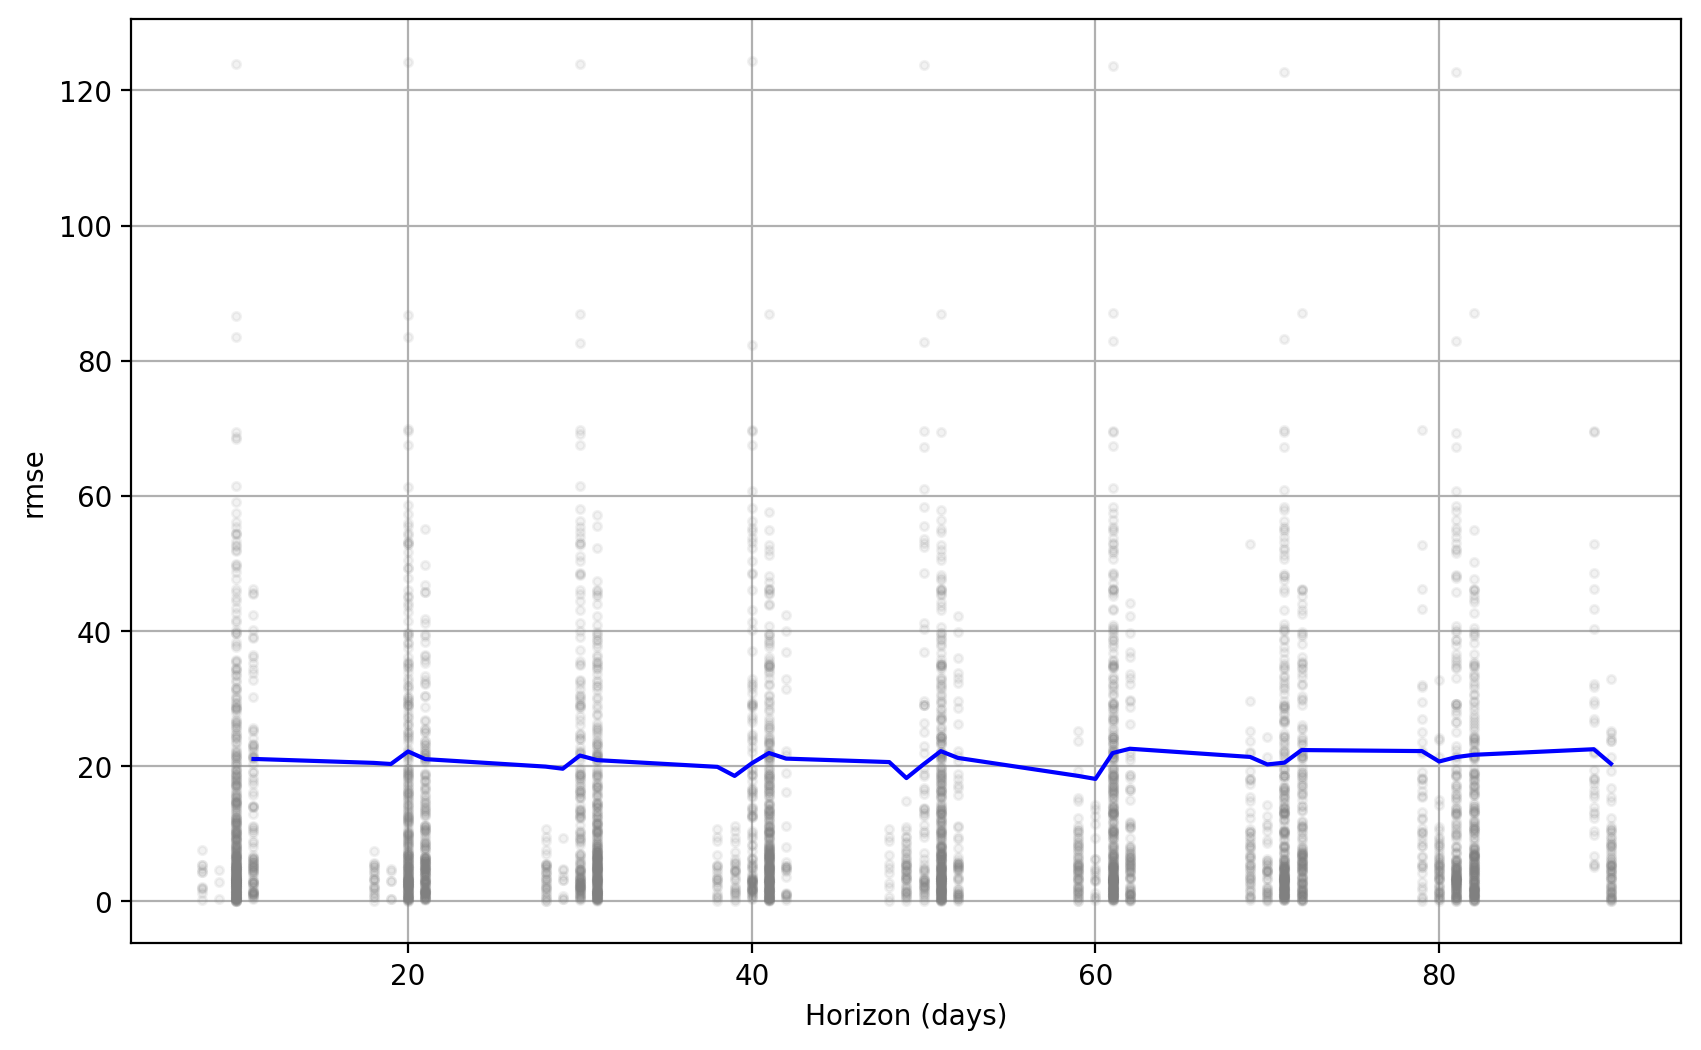

In [18]:
# выполняем перекрестную проверку с 
# пользовательскими пороговыми точками
df_cv = cross_validation(model,
                         horizon='90 days',
                         parallel='processes',
                         cutoffs=cutoffs)
df_p = performance_metrics(df_cv)
fig = plot_cross_validation_metric(df_cv, metric='rmse')
plt.show()

In [19]:
# задаем сетку гиперпараметров
param_grid = {'changepoint_prior_scale': [0.01, 0.001],
              'seasonality_prior_scale': [1.0, 0.1]}

In [20]:
import numpy as np
import itertools

# создаем список словарей - комбинаций гиперпараметров
all_params = [dict(zip(param_grid.keys(), value))
              for value in itertools.product(*param_grid.values())]
# создаем пустой список, в котором
# будем хранить значения RMSE
rmse_values= []

In [21]:
# создаем пользовательский список пороговых точек
cutoffs = [pd.Timestamp('{}-{}-{}'.format(year, month, day))
           for year in range(2010, 2019)
           for month in range(1, 13)
           for day in [1, 11, 21]]

In [22]:
# итерируем по комбинациям гиперпараметров и 
# выполняем перекрестную проверку
for params in all_params:
    model = Prophet(yearly_seasonality=4, 
                    seasonality_mode='additive', 
                    **params).fit(df)
    df_cv = cross_validation(model,
                             cutoffs=cutoffs,
                             horizon='30 days',
                             parallel='processes')
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmse_values.append(df_p['rmse'].values[0])

22:32:21 - cmdstanpy - INFO - Chain [1] start processing
22:32:21 - cmdstanpy - INFO - Chain [1] done processing
22:32:27 - cmdstanpy - INFO - Chain [1] start processing
22:32:27 - cmdstanpy - INFO - Chain [1] start processing
22:32:27 - cmdstanpy - INFO - Chain [1] start processing
22:32:27 - cmdstanpy - INFO - Chain [1] start processing
22:32:27 - cmdstanpy - INFO - Chain [1] start processing
22:32:27 - cmdstanpy - INFO - Chain [1] start processing
22:32:27 - cmdstanpy - INFO - Chain [1] start processing
22:32:27 - cmdstanpy - INFO - Chain [1] start processing
22:32:27 - cmdstanpy - INFO - Chain [1] start processing
22:32:27 - cmdstanpy - INFO - Chain [1] start processing
22:32:27 - cmdstanpy - INFO - Chain [1] start processing
22:32:27 - cmdstanpy - INFO - Chain [1] start processing
22:32:27 - cmdstanpy - INFO - Chain [1] start processing
22:32:27 - cmdstanpy - INFO - Chain [1] start processing
22:32:27 - cmdstanpy - INFO - Chain [1] start processing
22:32:27 - cmdstanpy - INFO - Ch

22:32:43 - cmdstanpy - INFO - Chain [1] start processing
22:32:43 - cmdstanpy - INFO - Chain [1] done processing
22:32:43 - cmdstanpy - INFO - Chain [1] done processing
22:32:43 - cmdstanpy - INFO - Chain [1] done processing
22:32:43 - cmdstanpy - INFO - Chain [1] done processing
22:32:43 - cmdstanpy - INFO - Chain [1] done processing
22:32:43 - cmdstanpy - INFO - Chain [1] done processing
22:32:43 - cmdstanpy - INFO - Chain [1] done processing
22:32:43 - cmdstanpy - INFO - Chain [1] done processing
22:32:43 - cmdstanpy - INFO - Chain [1] start processing
22:32:43 - cmdstanpy - INFO - Chain [1] done processing
22:32:43 - cmdstanpy - INFO - Chain [1] start processing
22:32:43 - cmdstanpy - INFO - Chain [1] done processing
22:32:43 - cmdstanpy - INFO - Chain [1] done processing
22:32:46 - cmdstanpy - INFO - Chain [1] start processing
22:32:46 - cmdstanpy - INFO - Chain [1] start processing
22:32:46 - cmdstanpy - INFO - Chain [1] start processing
22:32:46 - cmdstanpy - INFO - Chain [1] st

22:33:03 - cmdstanpy - INFO - Chain [1] start processing
22:33:03 - cmdstanpy - INFO - Chain [1] done processing
22:33:03 - cmdstanpy - INFO - Chain [1] done processing
22:33:03 - cmdstanpy - INFO - Chain [1] start processing
22:33:03 - cmdstanpy - INFO - Chain [1] start processing
22:33:03 - cmdstanpy - INFO - Chain [1] start processing
22:33:03 - cmdstanpy - INFO - Chain [1] start processing
22:33:04 - cmdstanpy - INFO - Chain [1] done processing
22:33:04 - cmdstanpy - INFO - Chain [1] done processing
22:33:04 - cmdstanpy - INFO - Chain [1] done processing
22:33:04 - cmdstanpy - INFO - Chain [1] done processing
22:33:04 - cmdstanpy - INFO - Chain [1] done processing
22:33:04 - cmdstanpy - INFO - Chain [1] done processing
22:33:04 - cmdstanpy - INFO - Chain [1] start processing
22:33:04 - cmdstanpy - INFO - Chain [1] done processing
22:33:04 - cmdstanpy - INFO - Chain [1] start processing
22:33:04 - cmdstanpy - INFO - Chain [1] done processing
22:33:08 - cmdstanpy - INFO - Chain [1] s

22:33:26 - cmdstanpy - INFO - Chain [1] start processing
22:33:26 - cmdstanpy - INFO - Chain [1] done processing
22:33:26 - cmdstanpy - INFO - Chain [1] done processing
22:33:27 - cmdstanpy - INFO - Chain [1] start processing
22:33:27 - cmdstanpy - INFO - Chain [1] start processing
22:33:27 - cmdstanpy - INFO - Chain [1] done processing
22:33:27 - cmdstanpy - INFO - Chain [1] done processing
22:33:27 - cmdstanpy - INFO - Chain [1] done processing
22:33:27 - cmdstanpy - INFO - Chain [1] start processing
22:33:27 - cmdstanpy - INFO - Chain [1] start processing
22:33:27 - cmdstanpy - INFO - Chain [1] done processing
22:33:27 - cmdstanpy - INFO - Chain [1] start processing
22:33:27 - cmdstanpy - INFO - Chain [1] start processing
22:33:27 - cmdstanpy - INFO - Chain [1] start processing
22:33:27 - cmdstanpy - INFO - Chain [1] start processing
22:33:27 - cmdstanpy - INFO - Chain [1] done processing
22:33:27 - cmdstanpy - INFO - Chain [1] start processing
22:33:27 - cmdstanpy - INFO - Chain [1

22:33:47 - cmdstanpy - INFO - Chain [1] done processing
22:33:47 - cmdstanpy - INFO - Chain [1] done processing
22:33:47 - cmdstanpy - INFO - Chain [1] done processing
22:33:48 - cmdstanpy - INFO - Chain [1] start processing
22:33:48 - cmdstanpy - INFO - Chain [1] done processing
22:33:49 - cmdstanpy - INFO - Chain [1] start processing
22:33:49 - cmdstanpy - INFO - Chain [1] done processing
22:33:51 - cmdstanpy - INFO - Chain [1] start processing
22:33:52 - cmdstanpy - INFO - Chain [1] done processing
22:33:52 - cmdstanpy - INFO - Chain [1] start processing
22:33:52 - cmdstanpy - INFO - Chain [1] start processing
22:33:52 - cmdstanpy - INFO - Chain [1] start processing
22:33:52 - cmdstanpy - INFO - Chain [1] start processing
22:33:52 - cmdstanpy - INFO - Chain [1] done processing
22:33:52 - cmdstanpy - INFO - Chain [1] done processing
22:33:52 - cmdstanpy - INFO - Chain [1] start processing
22:33:52 - cmdstanpy - INFO - Chain [1] done processing
22:33:52 - cmdstanpy - INFO - Chain [1] 

22:34:22 - cmdstanpy - INFO - Chain [1] done processing
22:34:22 - cmdstanpy - INFO - Chain [1] start processing
22:34:22 - cmdstanpy - INFO - Chain [1] done processing
22:34:22 - cmdstanpy - INFO - Chain [1] done processing
22:34:22 - cmdstanpy - INFO - Chain [1] start processing
22:34:22 - cmdstanpy - INFO - Chain [1] start processing
22:34:22 - cmdstanpy - INFO - Chain [1] done processing
22:34:22 - cmdstanpy - INFO - Chain [1] done processing
22:34:22 - cmdstanpy - INFO - Chain [1] done processing
22:34:22 - cmdstanpy - INFO - Chain [1] start processing
22:34:22 - cmdstanpy - INFO - Chain [1] start processing
22:34:22 - cmdstanpy - INFO - Chain [1] done processing
22:34:22 - cmdstanpy - INFO - Chain [1] start processing
22:34:22 - cmdstanpy - INFO - Chain [1] done processing
22:34:22 - cmdstanpy - INFO - Chain [1] done processing
22:34:22 - cmdstanpy - INFO - Chain [1] start processing
22:34:22 - cmdstanpy - INFO - Chain [1] done processing
22:34:22 - cmdstanpy - INFO - Chain [1] s

22:34:41 - cmdstanpy - INFO - Chain [1] done processing
22:34:41 - cmdstanpy - INFO - Chain [1] done processing
22:34:41 - cmdstanpy - INFO - Chain [1] done processing
22:34:45 - cmdstanpy - INFO - Chain [1] start processing
22:34:45 - cmdstanpy - INFO - Chain [1] start processing
22:34:45 - cmdstanpy - INFO - Chain [1] start processing
22:34:45 - cmdstanpy - INFO - Chain [1] start processing
22:34:45 - cmdstanpy - INFO - Chain [1] done processing
22:34:45 - cmdstanpy - INFO - Chain [1] done processing
22:34:45 - cmdstanpy - INFO - Chain [1] start processing
22:34:45 - cmdstanpy - INFO - Chain [1] start processing
22:34:45 - cmdstanpy - INFO - Chain [1] start processing
22:34:45 - cmdstanpy - INFO - Chain [1] done processing
22:34:45 - cmdstanpy - INFO - Chain [1] done processing
22:34:45 - cmdstanpy - INFO - Chain [1] start processing
22:34:45 - cmdstanpy - INFO - Chain [1] done processing
22:34:45 - cmdstanpy - INFO - Chain [1] start processing
22:34:46 - cmdstanpy - INFO - Chain [1]

22:35:04 - cmdstanpy - INFO - Chain [1] done processing
22:35:04 - cmdstanpy - INFO - Chain [1] done processing
22:35:04 - cmdstanpy - INFO - Chain [1] start processing
22:35:04 - cmdstanpy - INFO - Chain [1] done processing
22:35:04 - cmdstanpy - INFO - Chain [1] done processing
22:35:04 - cmdstanpy - INFO - Chain [1] start processing
22:35:04 - cmdstanpy - INFO - Chain [1] start processing
22:35:04 - cmdstanpy - INFO - Chain [1] done processing
22:35:04 - cmdstanpy - INFO - Chain [1] done processing
22:35:04 - cmdstanpy - INFO - Chain [1] start processing
22:35:04 - cmdstanpy - INFO - Chain [1] done processing
22:35:04 - cmdstanpy - INFO - Chain [1] done processing
22:35:07 - cmdstanpy - INFO - Chain [1] start processing
22:35:07 - cmdstanpy - INFO - Chain [1] start processing
22:35:07 - cmdstanpy - INFO - Chain [1] start processing
22:35:08 - cmdstanpy - INFO - Chain [1] start processing
22:35:08 - cmdstanpy - INFO - Chain [1] done processing
22:35:08 - cmdstanpy - INFO - Chain [1] 

22:35:26 - cmdstanpy - INFO - Chain [1] start processing
22:35:26 - cmdstanpy - INFO - Chain [1] done processing
22:35:26 - cmdstanpy - INFO - Chain [1] done processing
22:35:26 - cmdstanpy - INFO - Chain [1] done processing
22:35:26 - cmdstanpy - INFO - Chain [1] done processing
22:35:26 - cmdstanpy - INFO - Chain [1] done processing
22:35:26 - cmdstanpy - INFO - Chain [1] done processing
22:35:26 - cmdstanpy - INFO - Chain [1] start processing
22:35:26 - cmdstanpy - INFO - Chain [1] start processing
22:35:26 - cmdstanpy - INFO - Chain [1] start processing
22:35:27 - cmdstanpy - INFO - Chain [1] start processing
22:35:27 - cmdstanpy - INFO - Chain [1] done processing
22:35:27 - cmdstanpy - INFO - Chain [1] start processing
22:35:27 - cmdstanpy - INFO - Chain [1] done processing
22:35:27 - cmdstanpy - INFO - Chain [1] done processing
22:35:27 - cmdstanpy - INFO - Chain [1] done processing
22:35:27 - cmdstanpy - INFO - Chain [1] start processing
22:35:27 - cmdstanpy - INFO - Chain [1] d

22:35:50 - cmdstanpy - INFO - Chain [1] start processing
22:35:50 - cmdstanpy - INFO - Chain [1] start processing
22:35:50 - cmdstanpy - INFO - Chain [1] start processing
22:35:50 - cmdstanpy - INFO - Chain [1] start processing
22:35:50 - cmdstanpy - INFO - Chain [1] start processing
22:35:50 - cmdstanpy - INFO - Chain [1] done processing
22:35:50 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
22:35:50 - cmdstanpy - INFO - Chain [1] done processing
22:35:50 - cmdstanpy - INFO - Chain [1] start processing
22:35:50 - cmdstanpy - INFO - Chain [1] done processing
22:35:50 - cmdstanpy - INFO - Chain [1] done processing
22:35:53 - cmdstanpy - INFO - Chain [1] done processing
22:35:54 - cmdstanpy - INFO - Chain [1] done processing
22:35:54 - cmdstanpy - INFO - Chain [1] done processing
22:35:54 - cmdstanpy - INFO - Chain [1] done processing
22:35:55 - cmdstanpy - INFO - Chain [1] done processing


22:36:07 - cmdstanpy - INFO - Chain [1] start processing
22:36:07 - cmdstanpy - INFO - Chain [1] start processing
22:36:07 - cmdstanpy - INFO - Chain [1] done processing
22:36:07 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
22:36:07 - cmdstanpy - INFO - Chain [1] start processing
22:36:07 - cmdstanpy - INFO - Chain [1] start processing
22:36:07 - cmdstanpy - INFO - Chain [1] start processing
22:36:07 - cmdstanpy - INFO - Chain [1] done processing
22:36:07 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
22:36:07 - cmdstanpy - INFO - Chain [1] done processing
22:36:07 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
22:36:08 - cmdstanpy - INFO - Chain [1] start processing
22:36:08 - cmdstanpy - INFO 

22:36:25 - cmdstanpy - INFO - Chain [1] start processing
22:36:25 - cmdstanpy - INFO - Chain [1] done processing
22:36:25 - cmdstanpy - INFO - Chain [1] start processing
22:36:25 - cmdstanpy - INFO - Chain [1] start processing
22:36:25 - cmdstanpy - INFO - Chain [1] done processing
22:36:25 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
22:36:25 - cmdstanpy - INFO - Chain [1] done processing
22:36:25 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
22:36:25 - cmdstanpy - INFO - Chain [1] start processing
22:36:25 - cmdstanpy - INFO - Chain [1] start processing
22:36:26 - cmdstanpy - INFO - Chain [1] done processing
22:36:27 - cmdstanpy - INFO - Chain [1] done processing
22:36:27 - cmdstanpy - INFO - Chain [1] start processing
22:36:27 - cmdstanpy - INFO - Chain [1] done processing
22:36:27 - cmd

22:36:40 - cmdstanpy - INFO - Chain [1] done processing
22:36:40 - cmdstanpy - INFO - Chain [1] start processing
22:36:40 - cmdstanpy - INFO - Chain [1] done processing
22:36:40 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
22:36:41 - cmdstanpy - INFO - Chain [1] start processing
22:36:42 - cmdstanpy - INFO - Chain [1] done processing
22:36:42 - cmdstanpy - INFO - Chain [1] start processing
22:36:42 - cmdstanpy - INFO - Chain [1] done processing
22:36:42 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
22:36:42 - cmdstanpy - INFO - Chain [1] start processing
22:36:42 - cmdstanpy - INFO - Chain [1] start processing
22:36:42 - cmdstanpy - INFO - Chain [1] done processing
22:36:42 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormall

22:36:55 - cmdstanpy - INFO - Chain [1] start processing
22:36:55 - cmdstanpy - INFO - Chain [1] start processing
22:36:55 - cmdstanpy - INFO - Chain [1] done processing
22:36:55 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
22:36:55 - cmdstanpy - INFO - Chain [1] done processing
22:36:55 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
22:36:55 - cmdstanpy - INFO - Chain [1] start processing
22:36:55 - cmdstanpy - INFO - Chain [1] start processing
22:36:56 - cmdstanpy - INFO - Chain [1] done processing
22:36:57 - cmdstanpy - INFO - Chain [1] start processing
22:36:57 - cmdstanpy - INFO - Chain [1] done processing
22:36:57 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
22:36:57 - cmdstanpy - INFO -

22:37:12 - cmdstanpy - INFO - Chain [1] start processing
22:37:12 - cmdstanpy - INFO - Chain [1] done processing
22:37:12 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
22:37:12 - cmdstanpy - INFO - Chain [1] start processing
22:37:13 - cmdstanpy - INFO - Chain [1] start processing
22:37:13 - cmdstanpy - INFO - Chain [1] start processing
22:37:13 - cmdstanpy - INFO - Chain [1] done processing
22:37:13 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
22:37:13 - cmdstanpy - INFO - Chain [1] done processing
22:37:13 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
22:37:13 - cmdstanpy - INFO - Chain [1] start processing
22:37:13 - cmdstanpy - INFO - Chain [1] start processing
22:37:13 - cmdstanpy - INFO 

22:37:32 - cmdstanpy - INFO - Chain [1] start processing
22:37:32 - cmdstanpy - INFO - Chain [1] done processing
22:37:32 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
22:37:32 - cmdstanpy - INFO - Chain [1] done processing
22:37:32 - cmdstanpy - INFO - Chain [1] start processing
22:37:32 - cmdstanpy - INFO - Chain [1] start processing
22:37:32 - cmdstanpy - INFO - Chain [1] done processing
22:37:32 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
22:37:32 - cmdstanpy - INFO - Chain [1] start processing
22:37:33 - cmdstanpy - INFO - Chain [1] start processing
22:37:33 - cmdstanpy - INFO - Chain [1] done processing
22:37:33 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
22:37:33 - cmdstanpy - INFO -

22:37:49 - cmdstanpy - INFO - Chain [1] start processing
22:37:49 - cmdstanpy - INFO - Chain [1] done processing
22:37:49 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
22:37:49 - cmdstanpy - INFO - Chain [1] start processing
22:37:50 - cmdstanpy - INFO - Chain [1] start processing
22:37:50 - cmdstanpy - INFO - Chain [1] start processing
22:37:50 - cmdstanpy - INFO - Chain [1] done processing
22:37:50 - cmdstanpy - INFO - Chain [1] start processing
22:37:50 - cmdstanpy - INFO - Chain [1] done processing
22:37:50 - cmdstanpy - INFO - Chain [1] done processing
22:37:50 - cmdstanpy - INFO - Chain [1] done processing
22:37:50 - cmdstanpy - INFO - Chain [1] done processing
22:37:50 - cmdstanpy - INFO - Chain [1] done processing
22:37:50 - cmdstanpy - INFO - Chain [1] start processing
22:37:51 - cmdstanpy - INFO - Chain [1] done processing
22:37:51 - cmdstanpy - INFO - Chain [1] start processing

22:38:07 - cmdstanpy - INFO - Chain [1] start processing
22:38:08 - cmdstanpy - INFO - Chain [1] start processing
22:38:08 - cmdstanpy - INFO - Chain [1] done processing
22:38:08 - cmdstanpy - INFO - Chain [1] start processing
22:38:08 - cmdstanpy - INFO - Chain [1] start processing
22:38:08 - cmdstanpy - INFO - Chain [1] done processing
22:38:08 - cmdstanpy - INFO - Chain [1] done processing
22:38:08 - cmdstanpy - INFO - Chain [1] start processing
22:38:08 - cmdstanpy - INFO - Chain [1] done processing
22:38:08 - cmdstanpy - INFO - Chain [1] start processing
22:38:08 - cmdstanpy - INFO - Chain [1] done processing
22:38:10 - cmdstanpy - INFO - Chain [1] start processing
22:38:10 - cmdstanpy - INFO - Chain [1] start processing
22:38:10 - cmdstanpy - INFO - Chain [1] done processing
22:38:10 - cmdstanpy - INFO - Chain [1] done processing
22:38:10 - cmdstanpy - INFO - Chain [1] start processing
22:38:10 - cmdstanpy - INFO - Chain [1] done processing
22:38:11 - cmdstanpy - INFO - Chain [1]

22:38:25 - cmdstanpy - INFO - Chain [1] start processing
22:38:25 - cmdstanpy - INFO - Chain [1] done processing
22:38:27 - cmdstanpy - INFO - Chain [1] start processing
22:38:27 - cmdstanpy - INFO - Chain [1] start processing
22:38:27 - cmdstanpy - INFO - Chain [1] done processing
22:38:27 - cmdstanpy - INFO - Chain [1] done processing
22:38:27 - cmdstanpy - INFO - Chain [1] start processing
22:38:28 - cmdstanpy - INFO - Chain [1] start processing
22:38:28 - cmdstanpy - INFO - Chain [1] done processing
22:38:28 - cmdstanpy - INFO - Chain [1] done processing
22:38:28 - cmdstanpy - INFO - Chain [1] start processing
22:38:28 - cmdstanpy - INFO - Chain [1] done processing
22:38:28 - cmdstanpy - INFO - Chain [1] start processing
22:38:28 - cmdstanpy - INFO - Chain [1] start processing
22:38:28 - cmdstanpy - INFO - Chain [1] done processing
22:38:28 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton

22:38:44 - cmdstanpy - INFO - Chain [1] done processing
22:38:44 - cmdstanpy - INFO - Chain [1] start processing
22:38:44 - cmdstanpy - INFO - Chain [1] done processing
22:38:44 - cmdstanpy - INFO - Chain [1] start processing
22:38:45 - cmdstanpy - INFO - Chain [1] start processing
22:38:45 - cmdstanpy - INFO - Chain [1] done processing
22:38:45 - cmdstanpy - INFO - Chain [1] start processing
22:38:45 - cmdstanpy - INFO - Chain [1] done processing
22:38:45 - cmdstanpy - INFO - Chain [1] done processing
22:38:45 - cmdstanpy - INFO - Chain [1] done processing
22:38:45 - cmdstanpy - INFO - Chain [1] start processing
22:38:45 - cmdstanpy - INFO - Chain [1] done processing
22:38:45 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
22:38:45 - cmdstanpy - INFO - Chain [1] done processing
22:38:45 - cmdstanpy - INFO - Chain [1] start processing
22:38:46 - cmdstanpy - INFO - Chain [1] start processing

22:39:07 - cmdstanpy - INFO - Chain [1] done processing
22:39:07 - cmdstanpy - INFO - Chain [1] start processing
22:39:07 - cmdstanpy - INFO - Chain [1] start processing
22:39:07 - cmdstanpy - INFO - Chain [1] start processing
22:39:07 - cmdstanpy - INFO - Chain [1] done processing
22:39:07 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
22:39:07 - cmdstanpy - INFO - Chain [1] done processing
22:39:07 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
22:39:07 - cmdstanpy - INFO - Chain [1] done processing
22:39:07 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
22:39:07 - cmdstanpy - INFO - Chain [1] start processing
22:39:07 - cmdstanpy - INFO - Chain [1] start processing
22:39:07 - cmdstanpy - INFO -

22:39:16 - cmdstanpy - INFO - Chain [1] start processing
22:39:16 - cmdstanpy - INFO - Chain [1] start processing
22:39:16 - cmdstanpy - INFO - Chain [1] done processing
22:39:16 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
22:39:17 - cmdstanpy - INFO - Chain [1] start processing
22:39:18 - cmdstanpy - INFO - Chain [1] done processing
22:39:18 - cmdstanpy - INFO - Chain [1] done processing
22:39:18 - cmdstanpy - INFO - Chain [1] done processing
22:39:18 - cmdstanpy - INFO - Chain [1] done processing
22:39:19 - cmdstanpy - INFO - Chain [1] done processing
22:39:19 - cmdstanpy - INFO - Chain [1] start processing
22:39:20 - cmdstanpy - INFO - Chain [1] done processing
22:39:20 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
22:39:20 - cmdstanpy - INFO - Chain [1] start processing
22:39:20 - cmds

22:39:30 - cmdstanpy - INFO - Chain [1] start processing
22:39:31 - cmdstanpy - INFO - Chain [1] done processing
22:39:31 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
22:39:31 - cmdstanpy - INFO - Chain [1] start processing
22:39:31 - cmdstanpy - INFO - Chain [1] start processing
22:39:31 - cmdstanpy - INFO - Chain [1] done processing
22:39:31 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
22:39:31 - cmdstanpy - INFO - Chain [1] start processing
22:39:31 - cmdstanpy - INFO - Chain [1] done processing
22:39:31 - cmdstanpy - INFO - Chain [1] start processing
22:39:31 - cmdstanpy - INFO - Chain [1] done processing
22:39:31 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
22:39:31 - cmdstanpy - INFO -

22:39:46 - cmdstanpy - INFO - Chain [1] done processing
22:39:46 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
22:39:46 - cmdstanpy - INFO - Chain [1] start processing
22:39:46 - cmdstanpy - INFO - Chain [1] done processing
22:39:46 - cmdstanpy - INFO - Chain [1] done processing
22:39:48 - cmdstanpy - INFO - Chain [1] start processing
22:39:48 - cmdstanpy - INFO - Chain [1] start processing
22:39:48 - cmdstanpy - INFO - Chain [1] done processing
22:39:48 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
22:39:48 - cmdstanpy - INFO - Chain [1] done processing
22:39:48 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
22:39:48 - cmdstanpy - INFO - Chain [1] start processing
22:39:49 - cmdstanpy - INFO - 

22:40:01 - cmdstanpy - INFO - Chain [1] done processing
22:40:02 - cmdstanpy - INFO - Chain [1] start processing
22:40:02 - cmdstanpy - INFO - Chain [1] done processing
22:40:02 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
22:40:02 - cmdstanpy - INFO - Chain [1] start processing
22:40:02 - cmdstanpy - INFO - Chain [1] start processing
22:40:02 - cmdstanpy - INFO - Chain [1] done processing
22:40:02 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
22:40:02 - cmdstanpy - INFO - Chain [1] start processing
22:40:03 - cmdstanpy - INFO - Chain [1] done processing
22:40:03 - cmdstanpy - INFO - Chain [1] done processing
22:40:04 - cmdstanpy - INFO - Chain [1] done processing
22:40:04 - cmdstanpy - INFO - Chain [1] start processing
22:40:04 - cmdstanpy - INFO - Chain [1] done processing
22:40:04 - cmds

22:40:20 - cmdstanpy - INFO - Chain [1] done processing
22:40:20 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
22:40:20 - cmdstanpy - INFO - Chain [1] start processing
22:40:20 - cmdstanpy - INFO - Chain [1] done processing
22:40:22 - cmdstanpy - INFO - Chain [1] start processing
22:40:22 - cmdstanpy - INFO - Chain [1] start processing
22:40:22 - cmdstanpy - INFO - Chain [1] done processing
22:40:22 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
22:40:22 - cmdstanpy - INFO - Chain [1] done processing
22:40:22 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
22:40:22 - cmdstanpy - INFO - Chain [1] done processing
22:40:22 - cmdstanpy - INFO - Chain [1] start processing
22:40:22 - cmdstanpy - INFO - 

22:40:35 - cmdstanpy - INFO - Chain [1] start processing
22:40:35 - cmdstanpy - INFO - Chain [1] done processing
22:40:35 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
22:40:35 - cmdstanpy - INFO - Chain [1] start processing
22:40:35 - cmdstanpy - INFO - Chain [1] done processing
22:40:35 - cmdstanpy - INFO - Chain [1] done processing
22:40:36 - cmdstanpy - INFO - Chain [1] start processing
22:40:36 - cmdstanpy - INFO - Chain [1] done processing
22:40:36 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
22:40:36 - cmdstanpy - INFO - Chain [1] start processing
22:40:36 - cmdstanpy - INFO - Chain [1] start processing
22:40:36 - cmdstanpy - INFO - Chain [1] done processing
22:40:36 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormall

22:40:53 - cmdstanpy - INFO - Chain [1] start processing
22:40:53 - cmdstanpy - INFO - Chain [1] done processing
22:40:53 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
22:40:54 - cmdstanpy - INFO - Chain [1] start processing
22:40:55 - cmdstanpy - INFO - Chain [1] start processing
22:40:55 - cmdstanpy - INFO - Chain [1] done processing
22:40:55 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
22:40:55 - cmdstanpy - INFO - Chain [1] start processing
22:40:55 - cmdstanpy - INFO - Chain [1] start processing
22:40:55 - cmdstanpy - INFO - Chain [1] done processing
22:40:55 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
22:40:55 - cmdstanpy - INFO - Chain [1] start processing
22:40:55 - cmdstanpy - INFO 

22:41:15 - cmdstanpy - INFO - Chain [1] start processing
22:41:15 - cmdstanpy - INFO - Chain [1] start processing
22:41:15 - cmdstanpy - INFO - Chain [1] start processing
22:41:15 - cmdstanpy - INFO - Chain [1] done processing
22:41:15 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
22:41:15 - cmdstanpy - INFO - Chain [1] done processing
22:41:15 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
22:41:15 - cmdstanpy - INFO - Chain [1] start processing
22:41:15 - cmdstanpy - INFO - Chain [1] start processing
22:41:15 - cmdstanpy - INFO - Chain [1] start processing
22:41:15 - cmdstanpy - INFO - Chain [1] done processing
22:41:15 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
22:41:15 - cmdstanpy - INFO 

22:41:36 - cmdstanpy - INFO - Chain [1] start processing
22:41:36 - cmdstanpy - INFO - Chain [1] done processing
22:41:36 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
22:41:36 - cmdstanpy - INFO - Chain [1] start processing
22:41:37 - cmdstanpy - INFO - Chain [1] start processing
22:41:37 - cmdstanpy - INFO - Chain [1] done processing
22:41:37 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
22:41:37 - cmdstanpy - INFO - Chain [1] start processing
22:41:37 - cmdstanpy - INFO - Chain [1] start processing
22:41:37 - cmdstanpy - INFO - Chain [1] done processing
22:41:37 - cmdstanpy - ERROR - Chain [1] error: error during processing Stale NFS file handle
Optimization terminated abnormally. Falling back to Newton.
22:41:38 - cmdstanpy - INFO - Chain [1] start processing
22:41:38 - cmdstanpy - INFO 

In [23]:
# смотрим датафрейм с результатами оптимизации
results = pd.DataFrame(all_params)
results['rmse'] = rmse_values
results

,changepoint_prior_scale,seasonality_prior_scale,rmse
0,0.010,1.0,22.421750
1,0.010,0.1,22.440335
2,0.001,1.0,22.693591
3,0.001,0.1,22.622602


In [24]:
# печатаем наилучшую комбинацию гиперпараметров
best_params = all_params[np.argmin(rmse_values)]
print(best_params)

{'changepoint_prior_scale': 0.01, 'seasonality_prior_scale': 1.0}
